<BR>  
<BR>  
<BR>  
<BR> 
<div style="text-align: center; line-height: 1.8; margin-top: 2in;">
  
**Evaluate Regression and Regularized Regression Models in a Real-World Application**

<br>
<br>

Gladys Murage

<br>

College of Business, Engineering, and Technology, National University

<br>

TIM-8131 v2: Data Mining (8221718749)

<br>

Dr. Yuksel Karahan

<br>

December 16, 2025

</div>
<BR>  
<BR>  
<BR>
<BR>
<BR>  
<BR>  
<BR>  
<BR>  

# Dataset Source
The Nutrition CSV is used, sourced from online sources. It contains 8790 observations and 52 predictors before engineering, including numerical and categorical variables describing  nutrition value of foods. The variables used in the data set include a variety of integers, objects and floats.
<BR>
The data is downloaded and saved  in DropBox as "NutritionData.CSV". The file is then uploaded into Jupyter notebook, and the file is loaded using a different encoding  latin1 instead of the utf-8coding. Exploratory data analysis is carried out to visualize the shape, top 5 records, bottom 5 records, data types  and a summarization of statistics.
<BR>
<BR>

In [1]:
# Import and load libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
import warnings
warnings.filterwarnings('ignore')
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)


# Load the dataset with a different encoding
# Changed encoding from default utf-8 to latin1
df = pd.read_csv('NutritionData.csv', encoding='latin1')  

# Separate features and target
y = df["Energ_Kcal"]
X = df.drop(columns=["Energ_Kcal"])


/opt/conda/envs/anaconda-ai-2025.12-py312/lib/python3.12/site-packages/xgboost/core.py:377: FutureWarning: Your system has an old version of glibc (< 2.28). We will stop supporting Linux distros with glibc older than 2.28 after **May 31, 2025**. Please upgrade to a recent Linux distro (with glibc >= 2.28) to use future versions of XGBoost.
Note: You have installed the 'manylinux2014' variant of XGBoost. Certain features such as GPU algorithms or federated learning are not available. To use these features, please upgrade to a recent Linux distro with glibc 2.28+, and install the 'manylinux_2_28' variant.
  warnings.warn(


# Exploratory Data Analysis 
Data is visualized before data processing in order to gain insights about shape,  statistics, and missing values.  
<BR>
<BR>

In [2]:
# Get an overview of the data to learn its shape. It has 8790 records and 52 predictors
df. shape

# Features minus the target variable
print(f"Number of features: {df.shape[1] - 1}") 

# the numberof samples or records
print(f"Number of samples: {df.shape[0]}")

Number of features: 51
Number of samples: 8790


In [3]:
# Visualize the first 5 records to learn the shape of the data
df. head()


,NDB_No,Shrt_Desc,Water,Energ_Kcal,Protein,Lipid_Tot,Ash,Carbohydrt,Fiber_TD,Sugar_Tot,...,Vit_D_IU,Vit_K,FA_Sat,FA_Mono,FA_Poly,Cholestrl,GmWt_1,GmWt_Desc1,GmWt_2,GmWt_Desc2
0,1001,"BUTTER,WITH SALT",15.87 g,717,0.85,81.11,2.11,0.06,0.0,0.06,...,0.0,7.0,51.368,21.021,3.043,215.0,5.00,"1 pat, (1"" sq, 1/3"" high)",14.2,1 tbsp
1,1002,"BUTTER,WHIPPED,W/ SALT",16.72 g,718,0.49,78.30,1.62,2.87,0.0,0.06,...,0.0,4.6,45.390,19.874,3.331,225.0,3.80,"1 pat, (1"" sq, 1/3"" high)",9.4,1 tbsp
2,1003,"BUTTER OIL,ANHYDROUS",0.24 g,876,0.28,99.48,0.00,0.00,0.0,0.00,...,0.0,8.6,61.924,28.732,3.694,256.0,12.80,1 tbsp,205.0,1 cup
3,1004,"CHEESE,BLUE",42.41 g,353,21.40,28.74,5.11,2.34,0.0,0.50,...,21.0,2.4,18.669,7.778,0.800,75.0,28.35,1 oz,17.0,1 cubic inch
4,1005,"CHEESE,BRICK",41.11 g,371,23.24,29.68,3.18,2.79,0.0,0.51,...,22.0,2.5,18.764,8.598,0.784,94.0,132.00,"1 cup, diced",113.0,"1 cup, shredded"


In [4]:
# Visualize the last 5 records to learn the shape of the data. Some columns have units in them, others have null values.
df.tail()

,NDB_No,Shrt_Desc,Water,Energ_Kcal,Protein,Lipid_Tot,Ash,Carbohydrt,Fiber_TD,Sugar_Tot,...,Vit_D_IU,Vit_K,FA_Sat,FA_Mono,FA_Poly,Cholestrl,GmWt_1,GmWt_Desc1,GmWt_2,GmWt_Desc2
8785,83110,"MACKEREL,SALTED",43 g,305,18.50,25.10,13.40,0.00,0.0,0.0,...,1006.0,7.8,7.148,8.320,6.210,95.0,80.0,"1 piece, (5-1/2"" x 1-1/2"" x 1/2"")",17.0,"1 cubic inch, boneless"
8786,90240,"SCALLOP,(BAY&SEA),CKD,STMD",70.25 g,111,20.54,0.84,2.97,5.41,0.0,0.0,...,2.0,0.0,0.218,0.082,0.222,41.0,85.0,3 oz,NaN,NaN
8787,90480,"SYRUP,CANE",26 g,269,0.00,0.00,0.86,73.14,0.0,73.2,...,0.0,0.0,0.000,0.000,0.000,0.0,21.0,1 serving,NaN,NaN
8788,90560,"SNAIL,RAW",79.2 g,90,16.10,1.40,1.30,2.00,0.0,0.0,...,0.0,0.1,0.361,0.259,0.252,50.0,85.0,3 oz,NaN,NaN
8789,93600,"TURTLE,GREEN,RAW",78.5 g,89,19.80,0.50,1.20,0.00,0.0,0.0,...,0.0,0.1,0.127,0.088,0.170,50.0,85.0,3 oz,NaN,NaN


In [5]:
# Get an overview of data types in the data set. A variety of data types: Integers, floats and objects. The predicted variable Energ_Kcal is a continous variable as an integer
df.dtypes

NDB_No           int64
Shrt_Desc       object
Water           object
Energ_Kcal       int64
Protein        float64
Lipid_Tot      float64
Ash            float64
Carbohydrt     float64
Fiber_TD       float64
Sugar_Tot      float64
Calcium        float64
Iron           float64
Magnesium      float64
Phosphorus     float64
Potassium      float64
Sodium         float64
Zinc           float64
Copper         float64
Manganese      float64
Selenium       float64
Vit_C          float64
Thiamin        float64
Riboflavin     float64
Niacin         float64
Panto_Acid     float64
Vit_B6         float64
Folate_Tot     float64
Folic_Acid     float64
Food_Folate    float64
Folate_DFE     float64
Choline_Tot    float64
Vit_B12        float64
Vit_A_IU       float64
Vit_A_RAE      float64
Retinol        float64
Alpha_Carot    float64
Beta_Carot     float64
Beta_Crypt     float64
Lycopene       float64
Lut+Zea        float64
Vit_E          float64
Vit_D          float64
Vit_D_IU       float64
Vit_K      

In [6]:
# Get an actual summary of the data types present in the data set. It helps show multicollinearity of features. It also shows variables with missing data.
df. info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 52 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   NDB_No       8790 non-null   int64  
 1   Shrt_Desc    8790 non-null   object 
 2   Water        8790 non-null   object 
 3   Energ_Kcal   8790 non-null   int64  
 4   Protein      8790 non-null   float64
 5   Lipid_Tot    8790 non-null   float64
 6   Ash          8465 non-null   float64
 7   Carbohydrt   8790 non-null   float64
 8   Fiber_TD     8196 non-null   float64
 9   Sugar_Tot    6958 non-null   float64
 10  Calcium      8442 non-null   float64
 11  Iron         8646 non-null   float64
 12  Magnesium    8051 non-null   float64
 13  Phosphorus   8211 non-null   float64
 14  Potassium    8364 non-null   float64
 15  Sodium       8707 non-null   float64
 16  Zinc         8084 non-null   float64
 17  Copper       7533 non-null   float64
 18  Manganese    6630 non-null   float64
 19  Seleni

In [7]:
# Summarize the statistics and transpose due to presence of 51 features
df.describe().T


,count,mean,std,min,25%,50%,75%,max
NDB_No,8790.0,15663.495222,9251.413586,1001.0,9086.25000,14427.5000,20142.75000,93600.000
Energ_Kcal,8790.0,226.317634,169.877539,0.0,91.00000,191.0000,337.00000,902.000
Protein,8790.0,11.342849,10.530474,0.0,2.38000,8.0000,19.88000,88.320
Lipid_Tot,8790.0,10.553725,15.814842,0.0,0.95000,5.1400,13.72000,100.000
Ash,8465.0,1.783468,3.004609,0.0,0.84000,1.2000,2.09000,99.800
Carbohydrt,8790.0,22.127710,27.270822,0.0,0.05000,9.3400,34.91000,100.000
Fiber_TD,8196.0,2.187445,4.383138,0.0,0.00000,0.7000,2.60000,79.000
Sugar_Tot,6958.0,8.543066,14.923626,0.0,0.00000,1.8400,9.28750,99.800
Calcium,8442.0,76.738214,203.527453,0.0,10.00000,21.0000,69.00000,7364.000
Iron,8646.0,2.699674,5.687560,0.0,0.54000,1.3800,2.60000,123.600


In [8]:
# Initial data exploration
print(f"\nTarget variable (Energ_Kcal) statistics:")
print(f"Mean: {df['Energ_Kcal'].mean():.2f}")
print(f"Std: {df['Energ_Kcal'].std():.2f}")
print(f"Min: {df['Energ_Kcal'].min()}")
print(f"Max: {df['Energ_Kcal'].max()}")


Target variable (Energ_Kcal) statistics:
Mean: 226.32
Std: 169.88
Min: 0
Max: 902


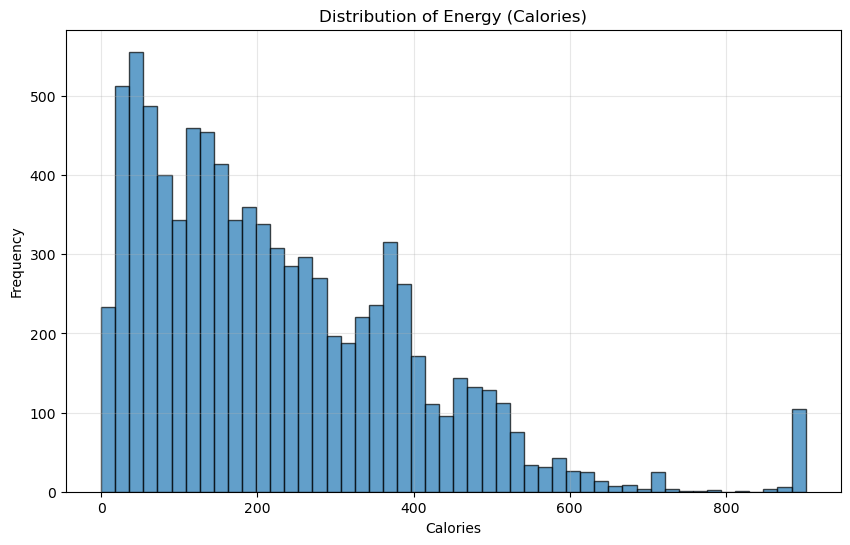

In [9]:
# Plot target variable distribution
plt.figure(figsize=(10, 6))
plt.hist(df['Energ_Kcal'], bins=50, edgecolor='black', alpha=0.7)
plt.title('Distribution of Energy (Calories)')
plt.xlabel('Calories')
plt.ylabel('Frequency')
plt.grid(True, alpha=0.3)
plt.savefig('HistogramCalories.png', dpi=300, bbox_inches='tight', 
            facecolor='white', edgecolor='none')
plt.show()


Top 10 features correlated with Energ_Kcal:
Energ_Kcal    1.000000
Lipid_Tot     0.806677
FA_Mono       0.691560
FA_Sat        0.624444
FA_Poly       0.607855
Carbohydrt    0.493028
Vit_E         0.370429
Sugar_Tot     0.351313
Magnesium     0.266927
Fiber_TD      0.204450
Name: Energ_Kcal, dtype: float64


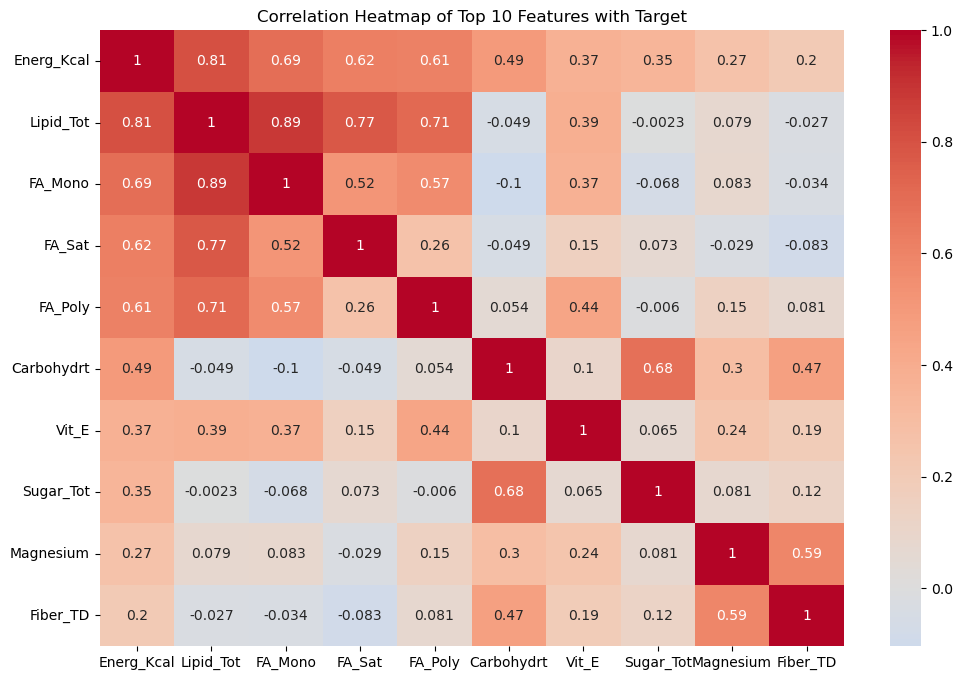

In [10]:
# Correlation analysis
numeric_cols = df.select_dtypes(include=[np.number]).columns
correlation_matrix = df[numeric_cols].corr()

# Plot correlation with target
target_corr = correlation_matrix['Energ_Kcal'].sort_values(ascending=False)
print("\nTop 10 features correlated with Energ_Kcal:")
print(target_corr.head(10))

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix.loc[target_corr.index[:10], target_corr.index[:10]], 
            annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap of Top 10 Features with Target')
plt.savefig('CorrelationHeatmap.png', dpi=300, bbox_inches='tight', 
            facecolor='white', edgecolor='none')
plt.show()

In [11]:
# Find missing values shows missing values as true. Data does have missing values as learned from df. info() True values confirm this.
df.isnull()

,NDB_No,Shrt_Desc,Water,Energ_Kcal,Protein,Lipid_Tot,Ash,Carbohydrt,Fiber_TD,Sugar_Tot,...,Vit_D_IU,Vit_K,FA_Sat,FA_Mono,FA_Poly,Cholestrl,GmWt_1,GmWt_Desc1,GmWt_2,GmWt_Desc2
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8785,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8786,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,True
8787,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,True
8788,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,True


In [12]:
# Visualize data if false it has records if True it is missing records
df.isna()

,NDB_No,Shrt_Desc,Water,Energ_Kcal,Protein,Lipid_Tot,Ash,Carbohydrt,Fiber_TD,Sugar_Tot,...,Vit_D_IU,Vit_K,FA_Sat,FA_Mono,FA_Poly,Cholestrl,GmWt_1,GmWt_Desc1,GmWt_2,GmWt_Desc2
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8785,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8786,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,True
8787,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,True
8788,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,True


In [13]:
# shows number of missing in each column. Target variable Energ_Kcal has no missing data.
df.isna().sum()

NDB_No            0
Shrt_Desc         0
Water             0
Energ_Kcal        0
Protein           0
Lipid_Tot         0
Ash             325
Carbohydrt        0
Fiber_TD        594
Sugar_Tot      1832
Calcium         348
Iron            144
Magnesium       739
Phosphorus      579
Potassium       426
Sodium           83
Zinc            706
Copper         1257
Manganese      2160
Selenium       1700
Vit_C           818
Thiamin         634
Riboflavin      616
Niacin          637
Panto_Acid     2242
Vit_B6          905
Folate_Tot     1261
Folic_Acid     2039
Food_Folate    1768
Folate_DFE     2057
Choline_Tot    4016
Vit_B12        1193
Vit_A_IU        711
Vit_A_RAE      1535
Retinol        1806
Alpha_Carot    3258
Beta_Carot     3162
Beta_Crypt     3270
Lycopene       3292
Lut+Zea        3315
Vit_E          2889
Vit_D          3262
Vit_D_IU       3211
Vit_K          3563
FA_Sat          349
FA_Mono         666
FA_Poly         665
Cholestrl       410
GmWt_1          300
GmWt_Desc1      299


In [14]:
# Shows each column and number of missing data set as a fraction
df.isna().sum()/df.shape[0]

NDB_No         0.000000
Shrt_Desc      0.000000
Water          0.000000
Energ_Kcal     0.000000
Protein        0.000000
Lipid_Tot      0.000000
Ash            0.036974
Carbohydrt     0.000000
Fiber_TD       0.067577
Sugar_Tot      0.208419
Calcium        0.039590
Iron           0.016382
Magnesium      0.084073
Phosphorus     0.065870
Potassium      0.048464
Sodium         0.009443
Zinc           0.080319
Copper         0.143003
Manganese      0.245734
Selenium       0.193402
Vit_C          0.093060
Thiamin        0.072127
Riboflavin     0.070080
Niacin         0.072469
Panto_Acid     0.255063
Vit_B6         0.102958
Folate_Tot     0.143458
Folic_Acid     0.231968
Food_Folate    0.201138
Folate_DFE     0.234016
Choline_Tot    0.456883
Vit_B12        0.135722
Vit_A_IU       0.080887
Vit_A_RAE      0.174630
Retinol        0.205461
Alpha_Carot    0.370648
Beta_Carot     0.359727
Beta_Crypt     0.372014
Lycopene       0.374516
Lut+Zea        0.377133
Vit_E          0.328669
Vit_D          0

In [15]:
# Calculates which column has the highest percentage of missings and sorts them
(df.isna ().sum ()/df.shape[0]).sort_values()

NDB_No         0.000000
Shrt_Desc      0.000000
Water          0.000000
Energ_Kcal     0.000000
Protein        0.000000
Lipid_Tot      0.000000
Carbohydrt     0.000000
Sodium         0.009443
Iron           0.016382
GmWt_Desc1     0.034016
GmWt_1         0.034130
Ash            0.036974
Calcium        0.039590
FA_Sat         0.039704
Cholestrl      0.046644
Potassium      0.048464
Phosphorus     0.065870
Fiber_TD       0.067577
Riboflavin     0.070080
Thiamin        0.072127
Niacin         0.072469
FA_Poly        0.075654
FA_Mono        0.075768
Zinc           0.080319
Vit_A_IU       0.080887
Magnesium      0.084073
Vit_C          0.093060
Vit_B6         0.102958
Vit_B12        0.135722
Copper         0.143003
Folate_Tot     0.143458
Vit_A_RAE      0.174630
Selenium       0.193402
Food_Folate    0.201138
Retinol        0.205461
Sugar_Tot      0.208419
Folic_Acid     0.231968
Folate_DFE     0.234016
Manganese      0.245734
Panto_Acid     0.255063
Vit_E          0.328669
Beta_Carot     0

In [16]:
# Number of columns not null for each variable.
df.count()

NDB_No         8790
Shrt_Desc      8790
Water          8790
Energ_Kcal     8790
Protein        8790
Lipid_Tot      8790
Ash            8465
Carbohydrt     8790
Fiber_TD       8196
Sugar_Tot      6958
Calcium        8442
Iron           8646
Magnesium      8051
Phosphorus     8211
Potassium      8364
Sodium         8707
Zinc           8084
Copper         7533
Manganese      6630
Selenium       7090
Vit_C          7972
Thiamin        8156
Riboflavin     8174
Niacin         8153
Panto_Acid     6548
Vit_B6         7885
Folate_Tot     7529
Folic_Acid     6751
Food_Folate    7022
Folate_DFE     6733
Choline_Tot    4774
Vit_B12        7597
Vit_A_IU       8079
Vit_A_RAE      7255
Retinol        6984
Alpha_Carot    5532
Beta_Carot     5628
Beta_Crypt     5520
Lycopene       5498
Lut+Zea        5475
Vit_E          5901
Vit_D          5528
Vit_D_IU       5579
Vit_K          5227
FA_Sat         8441
FA_Mono        8124
FA_Poly        8125
Cholestrl      8380
GmWt_1         8490
GmWt_Desc1     8491


# Data Preprocessing

## 1. Data Cleaning to change some data columns to numeric columns.
#### There are variables with mixed data types, that need cleaned. For example Water, GmWt_Desc2.
#### This allows us to visualize the missing data in the next step.
<BR>
<BR>

In [17]:
import pandas as pd
import re

def clean_numeric_columns(df, min_numeric_ratio=0.2):
    """Remove units from object columns and convert to numeric
       ONLY if the majority of values are numeric
    """
    
    unit_pattern = r'[^\d\.]+'

    for col in df.columns:
        if df[col].dtype == 'object':

            cleaned = (
                df[col]
                .astype(str)
                .str.lower()
                .str.replace(unit_pattern, '', regex=True)
            )

            numeric_col = pd.to_numeric(cleaned, errors='coerce')

            # Require most values to be numeric
            numeric_ratio = numeric_col.notna().mean()

            if numeric_ratio >= min_numeric_ratio:
                df[col] = numeric_col

    return df

df_clean = clean_numeric_columns(df.copy())





In [18]:
#check that the data is cleaned and that numeric columns contain no units such as grams, cups or tsp and short description is maintained as is.GmWt_Desc2 loses units.
df_clean.head()

,NDB_No,Shrt_Desc,Water,Energ_Kcal,Protein,Lipid_Tot,Ash,Carbohydrt,Fiber_TD,Sugar_Tot,...,Vit_D_IU,Vit_K,FA_Sat,FA_Mono,FA_Poly,Cholestrl,GmWt_1,GmWt_Desc1,GmWt_2,GmWt_Desc2
0,1001,"BUTTER,WITH SALT",15.87,717,0.85,81.11,2.11,0.06,0.0,0.06,...,0.0,7.0,51.368,21.021,3.043,215.0,5.00,1113.0,14.2,1.0
1,1002,"BUTTER,WHIPPED,W/ SALT",16.72,718,0.49,78.30,1.62,2.87,0.0,0.06,...,0.0,4.6,45.390,19.874,3.331,225.0,3.80,1113.0,9.4,1.0
2,1003,"BUTTER OIL,ANHYDROUS",0.24,876,0.28,99.48,0.00,0.00,0.0,0.00,...,0.0,8.6,61.924,28.732,3.694,256.0,12.80,1.0,205.0,1.0
3,1004,"CHEESE,BLUE",42.41,353,21.40,28.74,5.11,2.34,0.0,0.50,...,21.0,2.4,18.669,7.778,0.800,75.0,28.35,1.0,17.0,1.0
4,1005,"CHEESE,BRICK",41.11,371,23.24,29.68,3.18,2.79,0.0,0.51,...,22.0,2.5,18.764,8.598,0.784,94.0,132.00,1.0,113.0,1.0


# Data Preprocessing 

# 2. Visualization of the missing data in variables

## A. Pie Chart

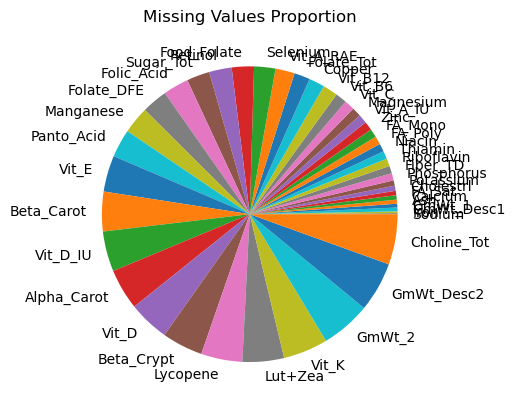

In [19]:
# I can visualize the missings as a pie chart but may have overlap due to high dimensionality
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'df' is already defined
df_clean =  clean_numeric_columns(df.copy())

# Calculate the proportion of missing values and plot as a pie chart
(df.isna().sum() / df.shape[0]).sort_values().plot(kind="pie")

#  Add a title for clarity
plt.title("Missing Values Proportion") 

 #  Save the plot
plt.savefig('PieChartMissingValues.png', dpi=300, bbox_inches='tight', 
            facecolor='white', edgecolor='none')
 #  Show the plot
plt.show()  

## B) Bar Graph of Missing Values Proportion

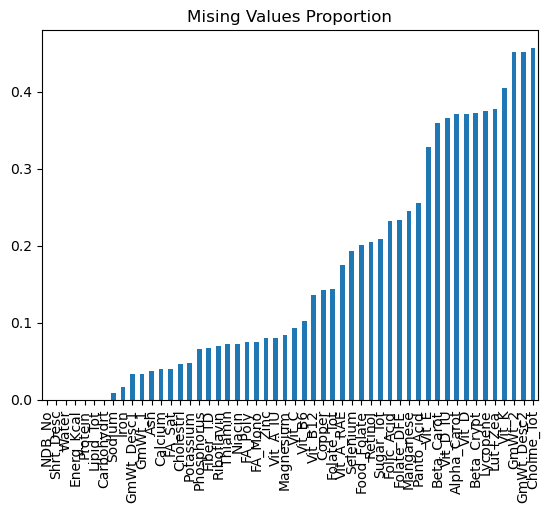

In [20]:
# df is already defined
df_clean =  clean_numeric_columns(df.copy())

# Calculate the proportion of missing values and plot as a bar chart
(df.isna().sum() / df.shape[0]).sort_values().plot(kind="bar")

# Add a title
plt.title("Mising Values Proportion")

# Save the plot
plt.savefig('BarChartMissingValues.png', dpi=300, bbox_inches='tight', 
            facecolor='white', edgecolor='none')
# Show the plot
plt.show()

In [21]:
# Counts variables with Nan (Null) values. 72972 variables have null values
df.isnull().sum().sum()

72972

In [22]:
# Install missingno library
!pip install missingno

Defaulting to user installation because normal site-packages is not writeable
Looking in links: /usr/share/pip-wheels


## C) Missing Number Horizontal Bar Graph

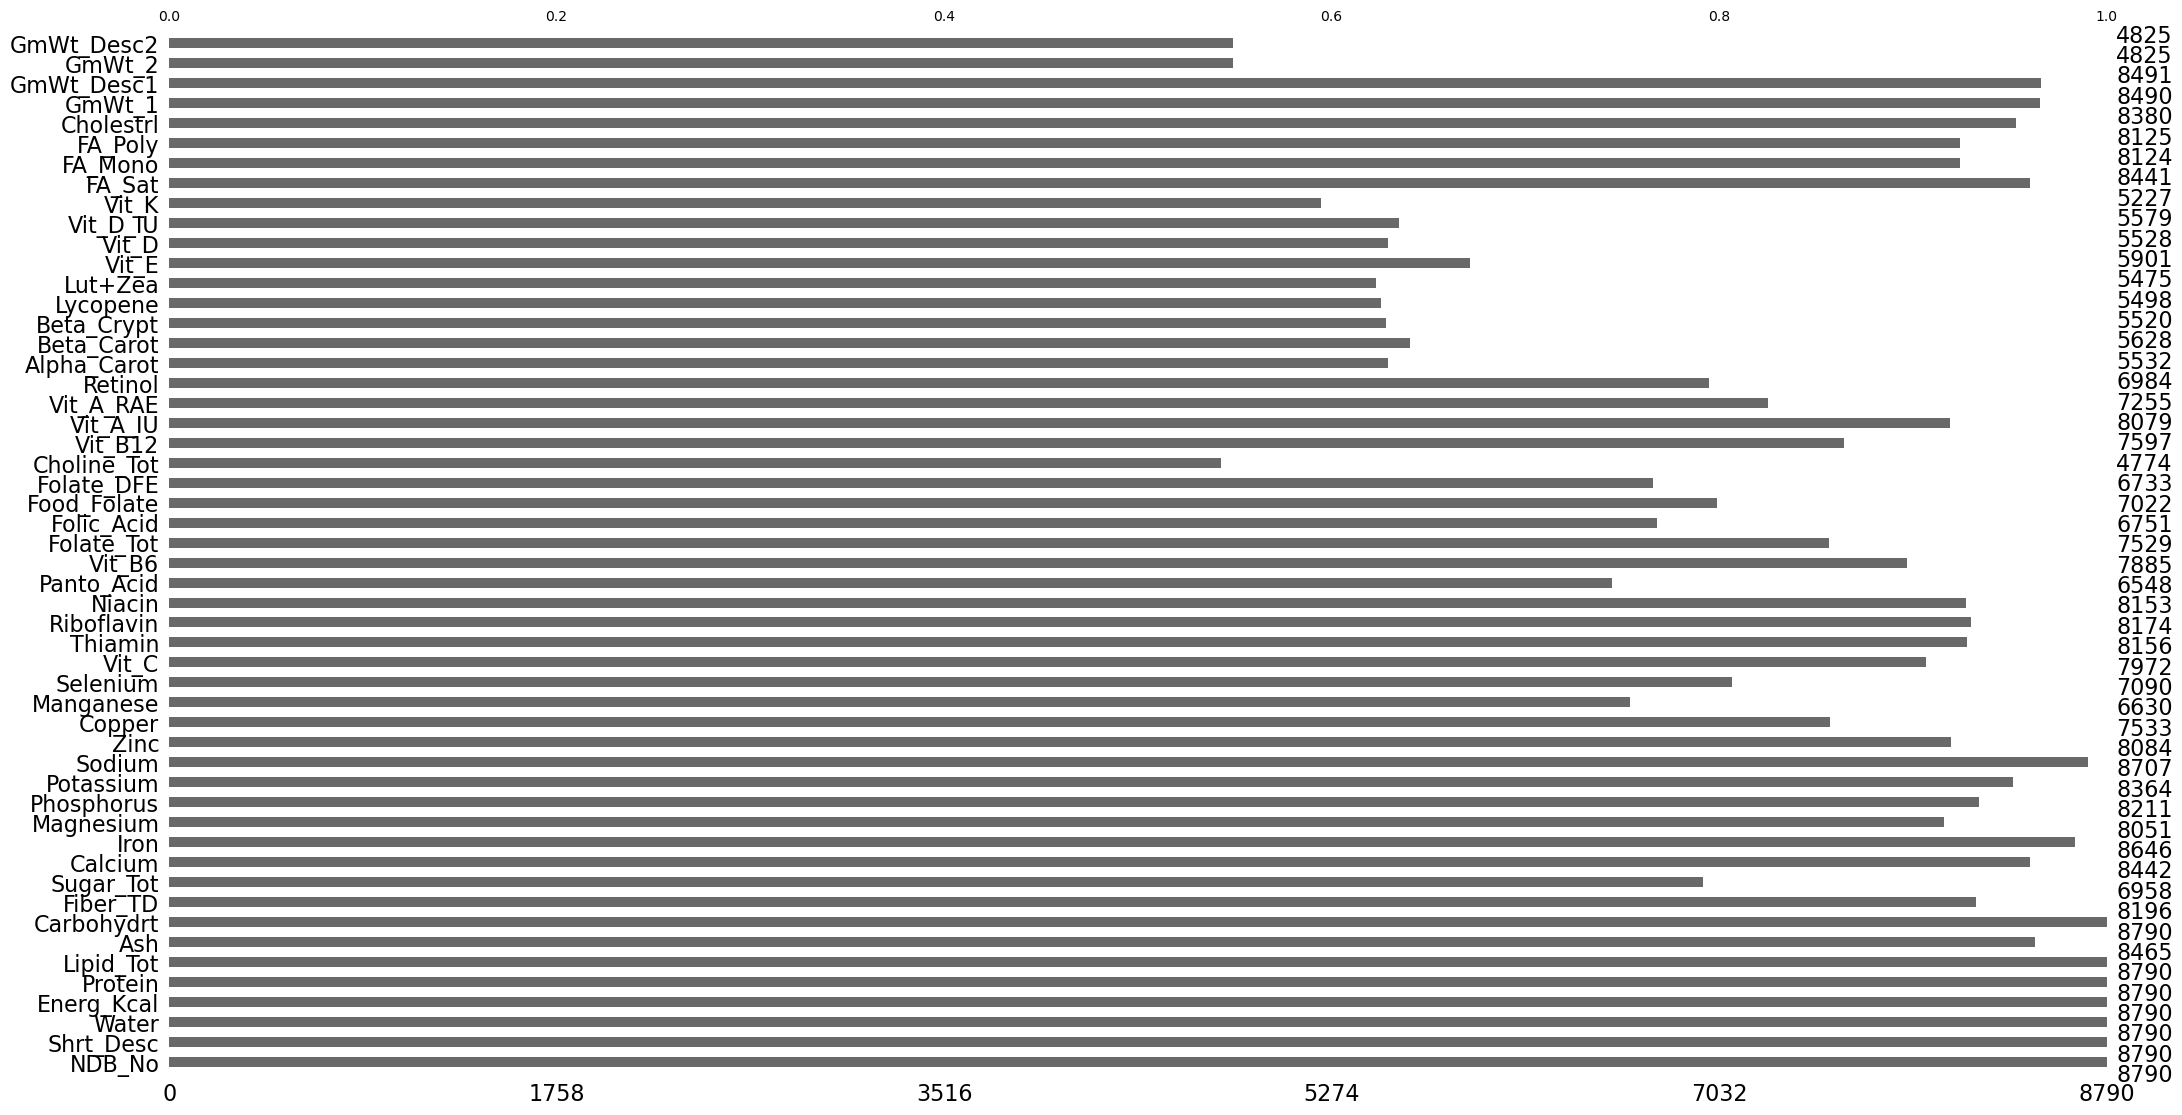

In [23]:
# Importing the missingno library
import missingno as msno

# Importing matplotlib for plotting
import matplotlib.pyplot as plt

# Import pandas library
import pandas as pd

# Load file
# df is already defined
df_clean =  clean_numeric_columns(df.copy())

# Visualizing the relative missingness of the columns.
# Pass the DataFrame 'df' instead of a string
msno.bar(df)  

# Save the plot
plt.savefig('MissingNoBarChart.png', dpi=300, bbox_inches='tight', 
            facecolor='white', edgecolor='none')

# Show the plot
plt.show()

## D) Relative Missingness of Data set Columns

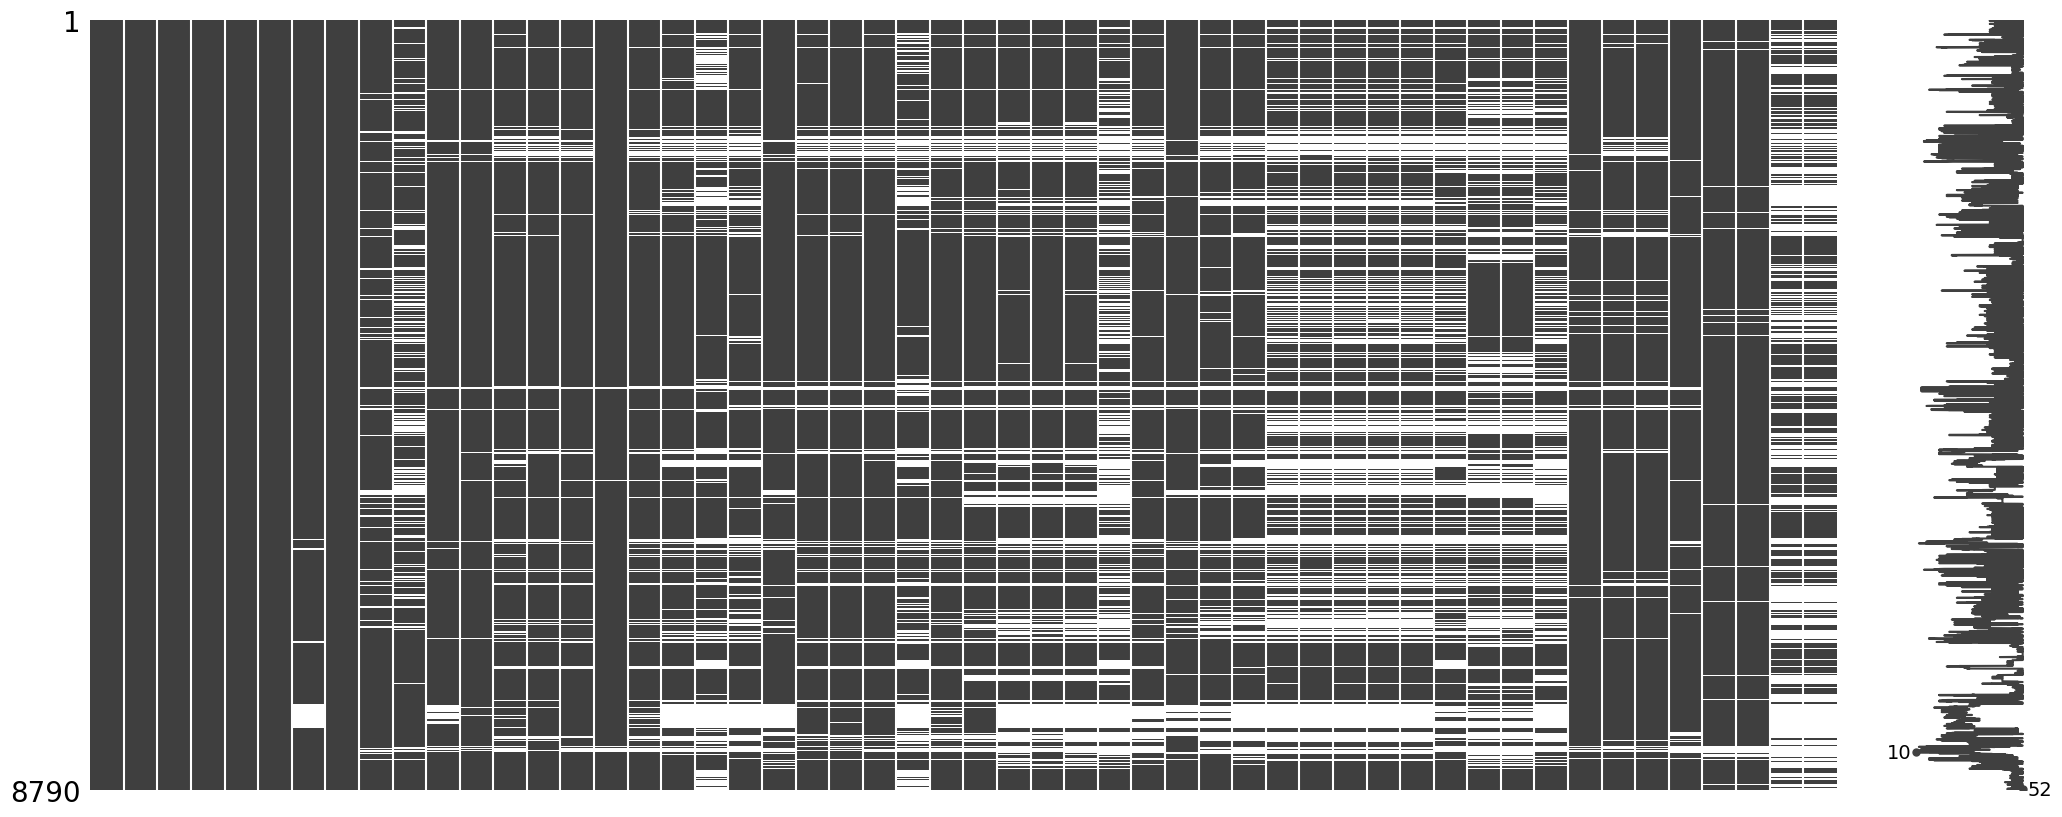

In [24]:
# How to visualize the relative missingness of the columns. White space given when missing a value.
msno.matrix(df)

# Show plot
plt.show()

## E) Heat Map of Relative Missingness of Columns

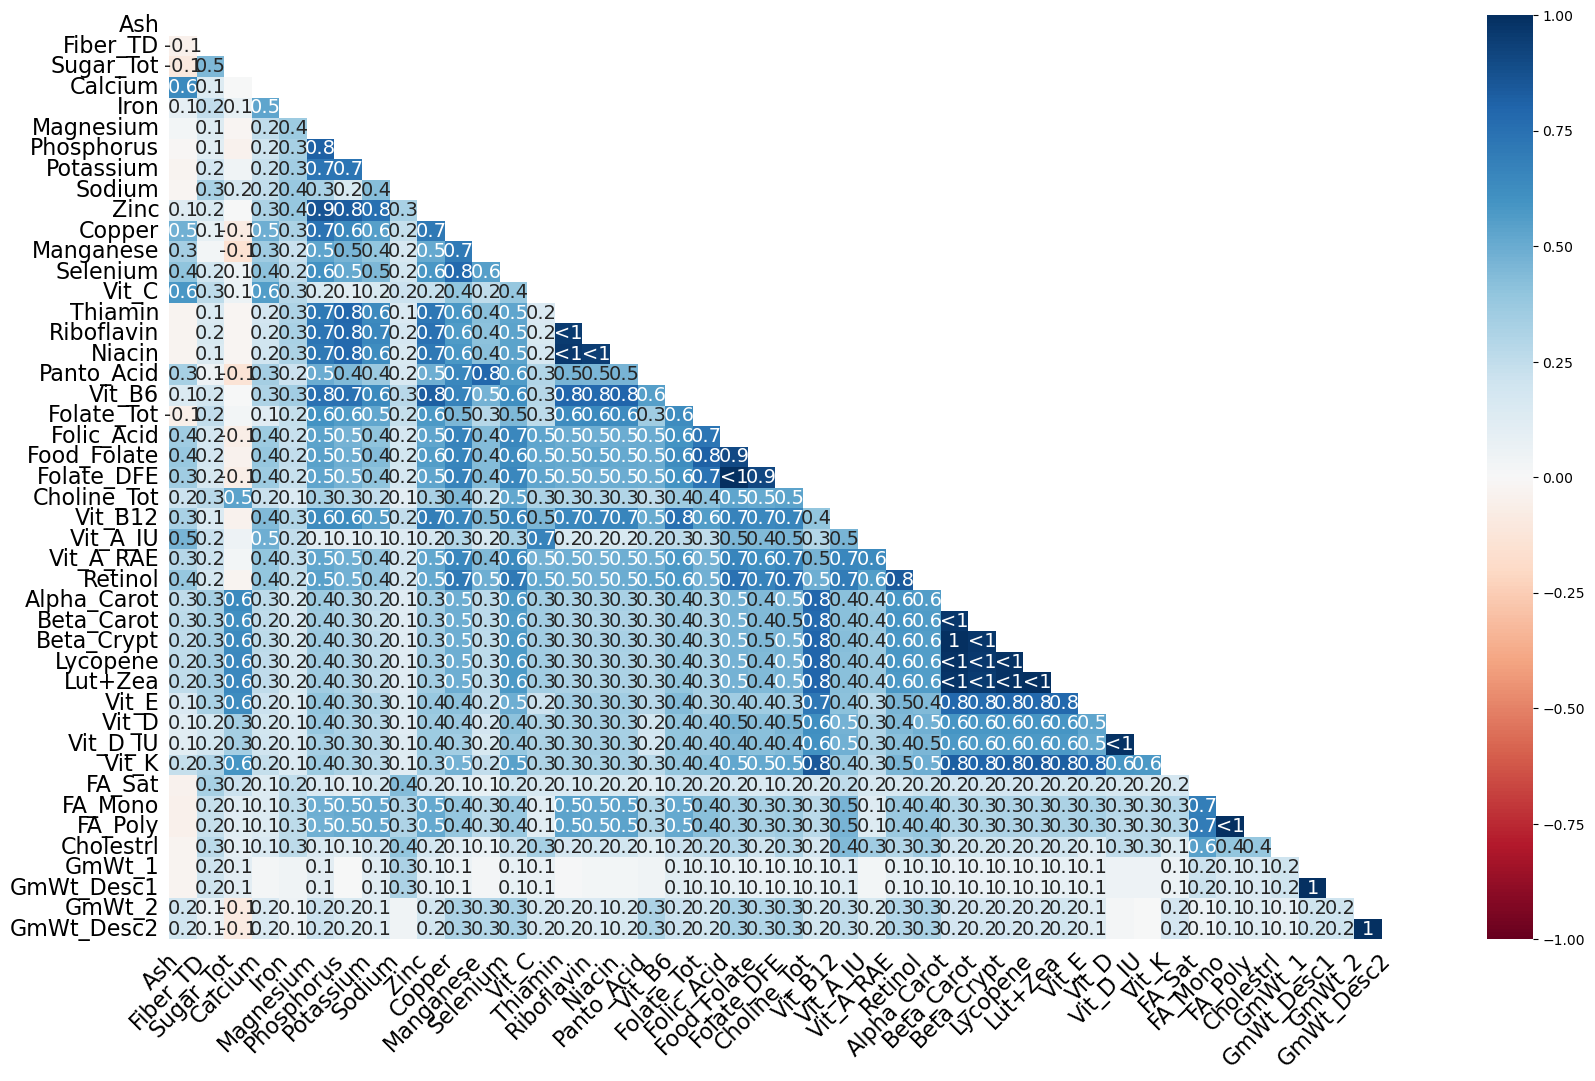

In [25]:
# How to visualize the relative missingness of the columns with a heat map.
# The heat map gives the relative missingness of one column to another.
# Import library
import missingno as msno
msno.heatmap(df)

# Save the plot
plt.savefig('MissingNoHeatMap.png', dpi=300, bbox_inches='tight', 
            facecolor='white', edgecolor='none')

# Show heatmap
plt.show ()

# Data Preprocessing
## 3 Identify Feature Types

In [26]:
# Identify feature types
numeric_features = X.select_dtypes(include=["int64", "float64"]).columns
categorical_features = X.select_dtypes(include=["object"]).columns


# Data Preprocessing
## 4. Handling Missing Values, Scaling and Encoding
1. Numerical variables that are missing will be imputed with the Median which handles outliers.
2. Categorical variables that are missing will be imputed with the mode.
3. Numerical values are scaled by standardizing them to have a mean of zero and a variance of one which aids models sensitive to regularization.
4. Categorical variables are encoded using one hot encoding 

<BR>
<BR>

In [27]:
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OneHotEncoder(handle_unknown="ignore"))
])

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features)
    ]
)


## 5. Handling Outliers
The interquartile method is used to remove outliers from numeric columns

In [28]:
# . Handle outliers using IQR method for numeric columns
def handle_outliers(df, columns=None):
    """Handle outliers using IQR method"""
    if columns is None:
        columns = df.select_dtypes(include=[np.number]).columns
    
    df_out = df.copy()
    
    for col in columns:
        if col == 'Energ_Kcal':  # Don't cap the target variable
            continue
            
        Q1 = df_out[col].quantile(0.25)
        Q3 = df_out[col].quantile(0.75)
        IQR = Q3 - Q1
        
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Cap outliers
        df_out[col] = np.where(df_out[col] < lower_bound, lower_bound, df_out[col])
        df_out[col] = np.where(df_out[col] > upper_bound, upper_bound, df_out[col])
    
    return df_out

df_clean = handle_outliers(df_clean)


## 6. Feature Engineering

In [29]:
# Feature engineering
def create_features(df):
    """Create new features from existing ones"""
    df_feat = df.copy()
    
    # Create interaction features
    if 'Protein' in df.columns and 'Lipid_Tot' in df.columns:
        df_feat['Protein_Fat_Ratio'] = df_feat['Protein'] / (df_feat['Lipid_Tot'] + 1)
    
    if 'Carbohydrt' in df.columns and 'Protein' in df.columns:
        df_feat['Carb_Protein_Ratio'] = df_feat['Carbohydrt'] / (df_feat['Protein'] + 1)
    
    # Create polynomial features
    if 'Protein' in df.columns:
        df_feat['Protein_Squared'] = df_feat['Protein'] ** 2
    
    if 'Lipid_Tot' in df.columns:
        df_feat['Fat_Squared'] = df_feat['Lipid_Tot'] ** 2
    
    # Create macronutrient total
    macronutrients = ['Protein', 'Lipid_Tot', 'Carbohydrt']
    existing_macros = [col for col in macronutrients if col in df.columns]
    if existing_macros:
        df_feat['Total_Macronutrients'] = df_feat[existing_macros].sum(axis=1)
    
    # Create nutrient density score
    if 'Protein' in df.columns and 'Water' in df.columns:
        df_feat['Nutrient_Density'] = df_feat['Protein'] / (df_feat['Water'] + 1)
    
    return df_feat

df_clean = create_features(df_clean)

print(f"Shape after cleaning and feature engineering: {df_clean.shape}")
print(f"Missing values after cleaning: {df_clean.isnull().sum().sum()}")

Shape after cleaning and feature engineering: (8790, 58)
Missing values after cleaning: 72982


# Implementation of the Models


The following models will be implemented and evaluated with cross validation:
## 1. Ordinary Least Squares (OLS)
The baseline linear model with no regularization.
## 2. Ridge (L2)
The model penalizes sum of squared coefficients and handles multicollinearity.
## 3. Lasso (L1)
The model penalizes absolute coefficients and performs feature selection.
## 4. Elastic Net
The model combines L1 and L2 penalties and balances selection and grouping.
## 5. Random Forest Regression
Bagging reduces variance; robust, less sensitive to scaling, captures nonlinearity and interactions.
## 6 XGBOOST Regression
Boosting reduces bias by sequentially correcting errors; use regularization and conservative learning rates to avoid overfitting.



In [30]:
#Import Libraries
from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import time


# Prepare data for modeling
# Select numeric columns for modeling
numeric_cols = df_clean.select_dtypes(include=[np.number]).columns
X = df_clean[numeric_cols].drop('Energ_Kcal', axis=1)
y = df_clean['Energ_Kcal']

# Remove any remaining NaN values
X = X.fillna(X.median())
y = y.fillna(y.median())

print(f"Feature matrix shape: {X.shape}")
print(f"Target vector shape: {y.shape}")

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"Training set: {X_train.shape}")
print(f"Testing set: {X_test.shape}")

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize models
models = {
    'OLS': LinearRegression(),
    'Ridge': Ridge(),
    'Lasso': Lasso(),
    'ElasticNet': ElasticNet(),
    'RandomForest': RandomForestRegressor(n_estimators=100, random_state=42),
    'XGBoost': XGBRegressor(n_estimators=100, random_state=42, verbosity=0)
}

# Function to calculate adjusted R²
def adjusted_r2(r2, n, p):
    return 1 - (1 - r2) * (n - 1) / (n - p - 1)

# Evaluate models with cross-validation
def evaluate_models_cv(models, X, y, cv=5):
    """Evaluate models using cross-validation"""
    results = {}
    kfold = KFold(n_splits=cv, shuffle=True, random_state=42)
    
    for name, model in models.items():
        print(f"\nEvaluating {name}...")
        
        # Cross-validation scores
        mae_scores = -cross_val_score(model, X, y, cv=kfold, 
                                       scoring='neg_mean_absolute_error')
        rmse_scores = np.sqrt(-cross_val_score(model, X, y, cv=kfold,
                                                scoring='neg_mean_squared_error'))
        r2_scores = cross_val_score(model, X, y, cv=kfold, scoring='r2')
        
        # Calculate adjusted R²
        n = len(X)
        p = X.shape[1]
        adj_r2_scores = [adjusted_r2(score, n, p) for score in r2_scores]
        
        results[name] = {
            'MAE_mean': mae_scores.mean(),
            'MAE_std': mae_scores.std(),
            'RMSE_mean': rmse_scores.mean(),
            'RMSE_std': rmse_scores.std(),
            'R2_mean': r2_scores.mean(),
            'R2_std': r2_scores.std(),
            'Adj_R2_mean': np.mean(adj_r2_scores),
            'Adj_R2_std': np.std(adj_r2_scores)
        }
        
        print(f"  MAE: {mae_scores.mean():.2f} ± {mae_scores.std():.2f}")
        print(f"  RMSE: {rmse_scores.mean():.2f} ± {rmse_scores.std():.2f}")
        print(f"  R²: {r2_scores.mean():.3f} ± {r2_scores.std():.3f}")
        print(f"  Adj R²: {results[name]['Adj_R2_mean']:.3f} ± {results[name]['Adj_R2_std']:.3f}")
    
    return results

# Initial evaluation
print("Initial Model Evaluation (5-fold CV):")
cv_results = evaluate_models_cv(models, X_train_scaled, y_train, cv=5)

Feature matrix shape: (8790, 56)
Target vector shape: (8790,)
Training set: (7032, 56)
Testing set: (1758, 56)
Initial Model Evaluation (5-fold CV):

Evaluating OLS...
  MAE: 11.63 ± 0.22
  RMSE: 25.13 ± 1.83
  R²: 0.978 ± 0.003
  Adj R²: 0.978 ± 0.003

Evaluating Ridge...
  MAE: 11.67 ± 0.22
  RMSE: 25.13 ± 1.82
  R²: 0.978 ± 0.003
  Adj R²: 0.978 ± 0.003

Evaluating Lasso...
  MAE: 12.86 ± 0.27
  RMSE: 26.50 ± 1.56
  R²: 0.975 ± 0.003
  Adj R²: 0.975 ± 0.003

Evaluating ElasticNet...
  MAE: 28.51 ± 0.91
  RMSE: 53.27 ± 2.96
  R²: 0.901 ± 0.009
  Adj R²: 0.900 ± 0.009

Evaluating RandomForest...
  MAE: 5.74 ± 0.18
  RMSE: 12.49 ± 0.96
  R²: 0.994 ± 0.001
  Adj R²: 0.994 ± 0.001

Evaluating XGBoost...
  MAE: 6.06 ± 0.16
  RMSE: 12.24 ± 0.59
  R²: 0.995 ± 0.001
  Adj R²: 0.995 ± 0.001


# Hyperparameter Tuning

# Hyperparameter Tuning with Cross validation
#### GridSearchCV for linear models (small parameter space)

#### RandomizedSearchCV for tree-based models (large parameter space)

#### 5-fold cross-validation for robust parameter estimation

#### Scoring metric: Negative RMSE (we want to minimize RMSE)

# Comprehensive Parameter Grids
#### Ridge/Lasso/ElasticNet: alpha, solver types, regularization strength

#### RandomForest: n_estimators, max_depth, min_samples, max_features

#### XGBoost: learning rate, depth, subsampling, regularization parameters (L1/L2)


Dataset shape: (8790, 52)
Training set: (7032, 47)
Testing set: (1758, 47)

OLS CV Scores (RMSE): 14.3176 ± 1.1322

Tuning Ridge...
Best parameters: {'alpha': 0.01, 'solver': 'sparse_cg'}
Best CV score (negative RMSE): -14.3137

Tuning Lasso...
Best parameters: {'alpha': 0.1, 'max_iter': 5000, 'selection': 'cyclic'}
Best CV score (negative RMSE): -14.2543

Tuning ElasticNet...
Best parameters: {'alpha': 0.001, 'l1_ratio': 0.9, 'max_iter': 5000}
Best CV score (negative RMSE): -14.3166

Tuning RandomForest...
Best parameters: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': None, 'max_depth': 15}
Best CV score (negative RMSE): -15.2159

Tuning XGBoost...


/opt/conda/envs/anaconda-ai-2025.12-py312/lib/python3.12/site-packages/xgboost/core.py:377: FutureWarning: Your system has an old version of glibc (< 2.28). We will stop supporting Linux distros with glibc older than 2.28 after **May 31, 2025**. Please upgrade to a recent Linux distro (with glibc >= 2.28) to use future versions of XGBoost.
Note: You have installed the 'manylinux2014' variant of XGBoost. Certain features such as GPU algorithms or federated learning are not available. To use these features, please upgrade to a recent Linux distro with glibc 2.28+, and install the 'manylinux_2_28' variant.
  warnings.warn(
/opt/conda/envs/anaconda-ai-2025.12-py312/lib/python3.12/site-packages/xgboost/core.py:377: FutureWarning: Your system has an old version of glibc (< 2.28). We will stop supporting Linux distros with glibc older than 2.28 after **May 31, 2025**. Please upgrade to a recent Linux distro (with glibc >= 2.28) to use future versions of XGBoost.
Note: You have installed the '

Best parameters: {'subsample': 1.0, 'reg_lambda': 0.01, 'reg_alpha': 0.01, 'n_estimators': 200, 'max_depth': 5, 'learning_rate': 0.05, 'colsample_bytree': 1.0}
Best CV score (negative RMSE): -13.5727

Hyperparameter tuning results saved to CSV

MODEL EVALUATION AFTER HYPERPARAMETER TUNING

Evaluating OLS
Metric          Training     Test         Gap       
--------------------------------------------------
MAE             6.2953       6.7671       0.4718    
RMSE            14.0885      18.9021      4.8136    
R2              0.9931       0.9880       0.0050    
Adj R2          0.9930       0.9877       0.0053    

Evaluating Ridge
Metric          Training     Test         Gap       
--------------------------------------------------
MAE             6.2945       6.7647       0.4702    
RMSE            14.0887      18.8987      4.8100    
R2              0.9931       0.9880       0.0050    
Adj R2          0.9930       0.9877       0.0053    

Evaluating Lasso
Metric          Training  

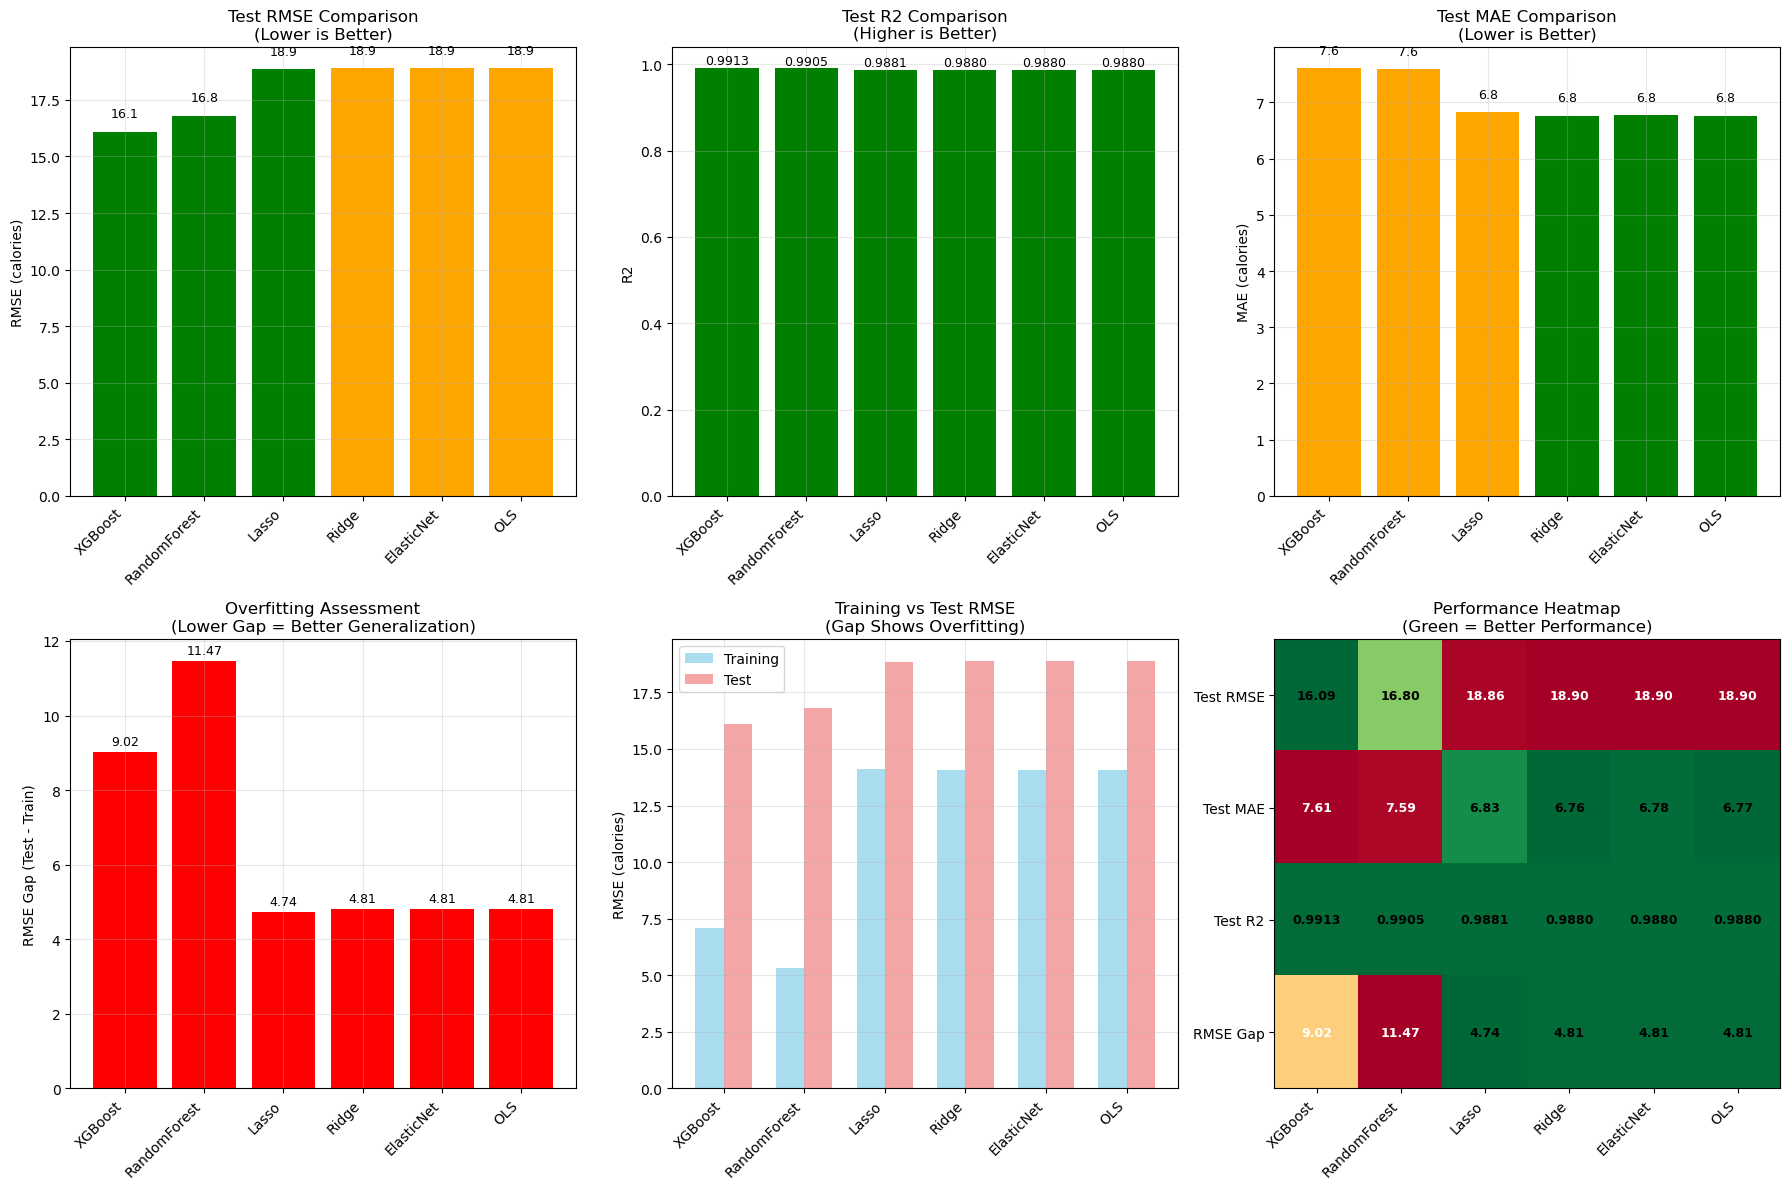

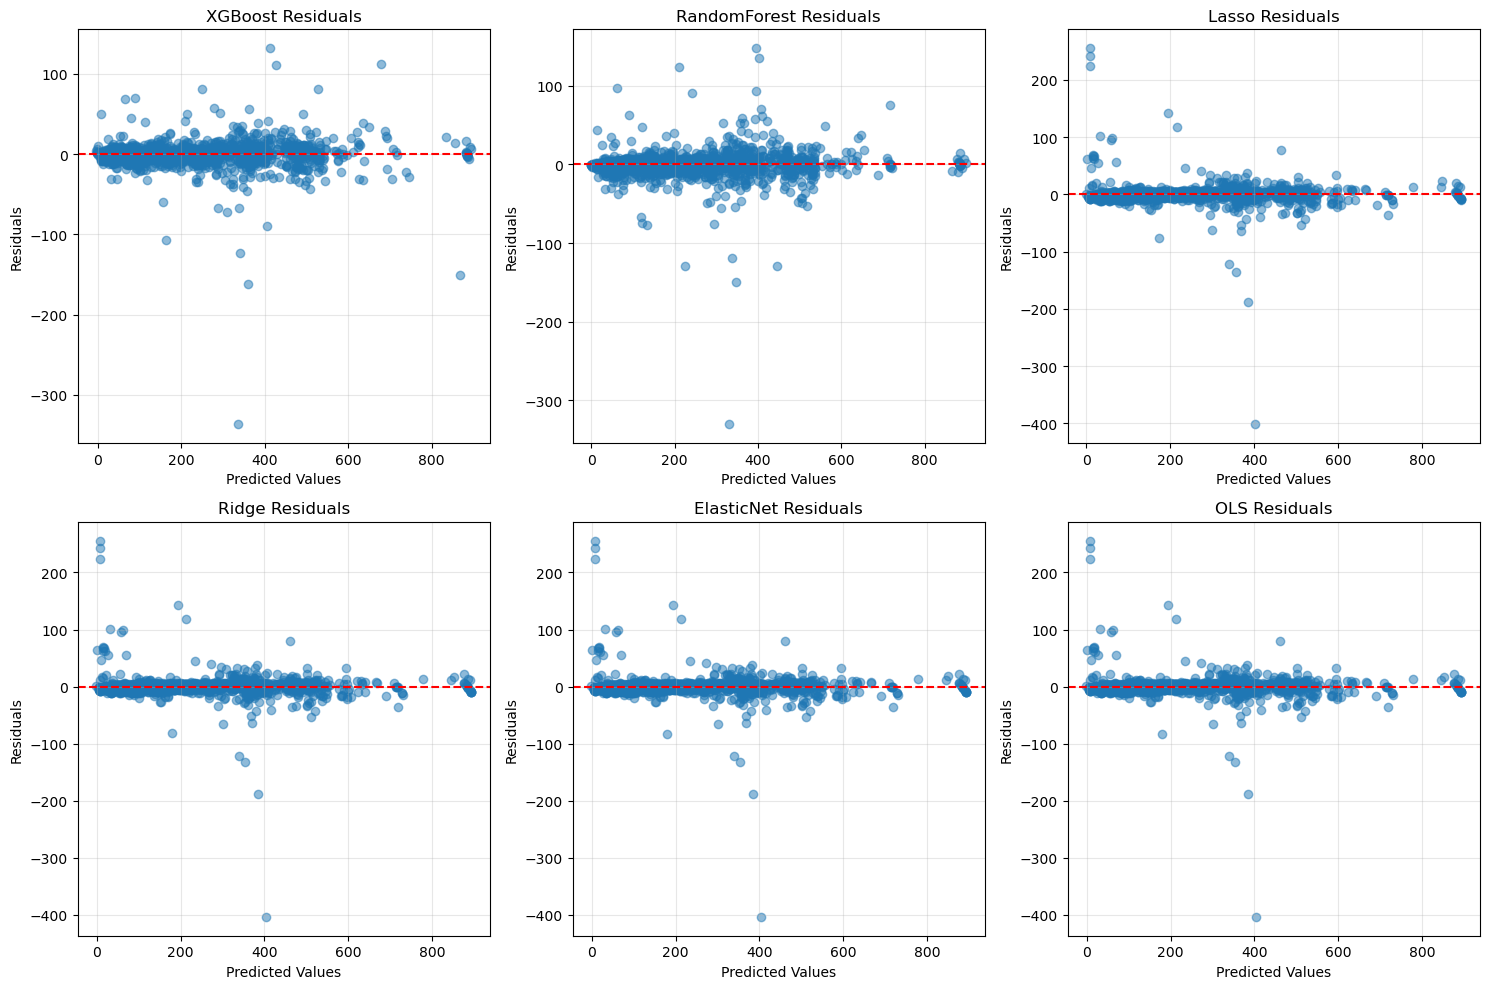

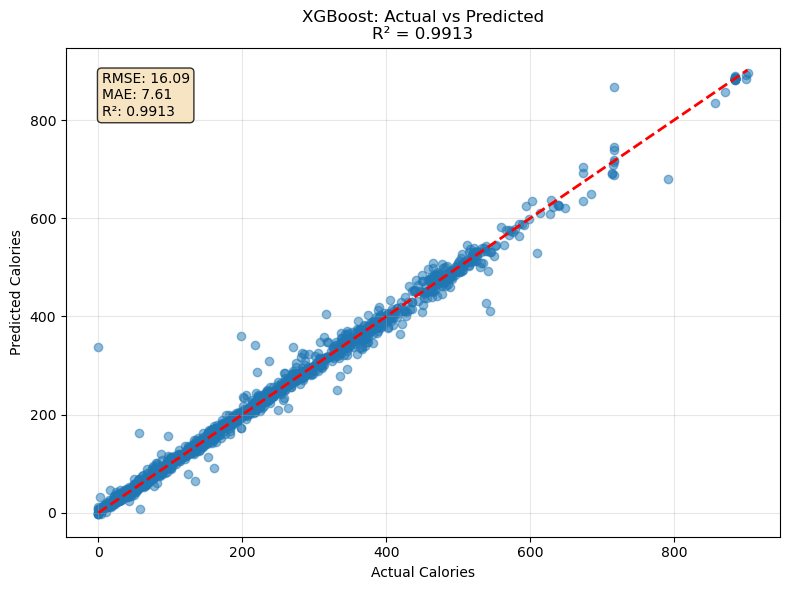

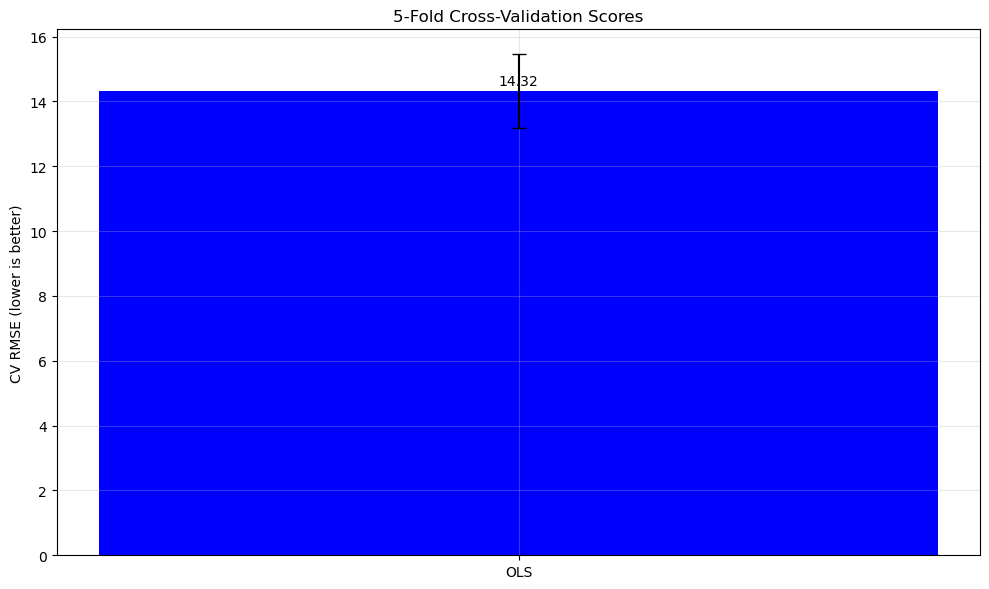


STATISTICAL SIGNIFICANCE TEST

Comparing Top 2 Models: XGBoost vs RandomForest
  Average absolute error XGBoost: 7.61 calories
  Average absolute error RandomForest: 7.59 calories
  T-statistic: 0.0720
  P-value: 0.942583
  Conclusion: No statistically significant difference (p >= 0.05)
  Both models perform similarly from a statistical perspective

FINAL MODEL SELECTION SUMMARY

Selected Best Model: XGBoost
----------------------------------------
Test Performance:
  • RMSE: 16.09 calories
  • MAE: 7.61 calories
  • R2: 0.9913
  • Adjusted R2: 0.9911

Overfitting Assessment:
  • RMSE Gap: 9.02 calories
  • R2 Gap: 0.0069

Best Hyperparameters:
  • colsample_bytree: 1.0
  • learning_rate: 0.05
  • max_depth: 5
  • n_estimators: 200
  • reg_alpha: 0.01
  • reg_lambda: 0.01
  • subsample: 1.0

Business Implications:
  • Average prediction error: ±7.6 calories
  • Model explains 99.1% of calorie variation

Model saved as 'model_results_20251221_234326/best_calorie_predictor.pkl'

All res

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from xgboost import XGBRegressor
from scipy import stats
import warnings
import joblib
import os
from datetime import datetime

# Create directory for saving outputs
output_dir = f'model_results_{datetime.now().strftime("%Y%m%d_%H%M%S")}'
os.makedirs(output_dir, exist_ok=True)

warnings.filterwarnings('ignore')

# --- DATA PREPARATION ---
# Load the data with latin1 encoding
df = pd.read_csv('NutritionData.csv', encoding='latin1')

# Select only numeric columns
numeric_cols = df.select_dtypes(include=[np.number]).columns
df_numeric = df[numeric_cols].copy()

# Handle missing values by filling with median
df_numeric = df_numeric.fillna(df_numeric.median())

# Prepare features and target
X = df_numeric.drop('Energ_Kcal', axis=1)
y = df_numeric['Energ_Kcal']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features for linear models
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"Dataset shape: {df.shape}")
print(f"Training set: {X_train.shape}")
print(f"Testing set: {X_test.shape}")

# --- HYPERPARAMETER TUNING WITH CROSS-VALIDATION ---
def tune_hyperparameters(model_name, model, param_grid, X_train, y_train):
    """Perform hyperparameter tuning with cross-validation"""
    print(f"\nTuning {model_name}...")
    
    # Use RandomizedSearchCV for large parameter spaces, GridSearchCV for small ones
    if model_name in ['RandomForest', 'XGBoost']:
        search = RandomizedSearchCV(
            model, 
            param_grid, 
            n_iter=20,  # Number of parameter settings sampled
            cv=5,  # 5-fold cross-validation
            scoring='neg_root_mean_squared_error',  # We want to minimize RMSE
            n_jobs=-1,
            random_state=42,
            verbose=0
        )
    else:
        search = GridSearchCV(
            model,
            param_grid,
            cv=5,
            scoring='neg_root_mean_squared_error',
            n_jobs=-1,
            verbose=0
        )
    
    search.fit(X_train, y_train)
    
    print(f"Best parameters: {search.best_params_}")
    print(f"Best CV score (negative RMSE): {search.best_score_:.4f}")
    
    return search.best_estimator_, search.best_params_, search.cv_results_

# --- DEFINE PARAMETER GRIDS FOR EACH MODEL ---
param_grids = {
    'Ridge': {
        'alpha': [0.01, 0.1, 1, 10, 100, 1000],
        'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']
    },
    'Lasso': {
        'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10],
        'max_iter': [5000, 10000],
        'selection': ['cyclic', 'random']
    },
    'ElasticNet': {
        'alpha': [0.0001, 0.001, 0.01, 0.1, 1],
        'l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9],
        'max_iter': [5000, 10000]
    },
    'RandomForest': {
        'n_estimators': [100, 200, 300, 400],
        'max_depth': [10, 15, 20, 25, 30, None],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'max_features': ['sqrt', 'log2', None]
    },
    'XGBoost': {
        'n_estimators': [100, 200, 300],
        'max_depth': [3, 5, 7, 9],
        'learning_rate': [0.01, 0.05, 0.1, 0.2],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'reg_alpha': [0, 0.01, 0.1, 2],  # L1 regularization
        'reg_lambda': [0.01, 0.1, 1, 20]  # L2 regularization
    }
}

# --- BASE MODELS ---
base_models = {
    'OLS': LinearRegression(),
    'Ridge': Ridge(random_state=42),
    'Lasso': Lasso(random_state=42, max_iter=5000),
    'ElasticNet': ElasticNet(random_state=42, max_iter=5000),
    'RandomForest': RandomForestRegressor(random_state=42, n_jobs=-1),
    'XGBoost': XGBRegressor(random_state=42, n_jobs=-1, verbosity=0)
}

# --- PERFORM HYPERPARAMETER TUNING ---
best_models = {}
tuning_results = {}
cv_scores = {}

for name in base_models.keys():
    if name == 'OLS':
        # OLS has no hyperparameters to tune
        best_models[name] = base_models[name]
        cv_scores[name] = cross_val_score(
            base_models[name], X_train_scaled, y_train,
            cv=5, scoring='neg_root_mean_squared_error', n_jobs=-1
        )
        print(f"\nOLS CV Scores (RMSE): {-cv_scores[name].mean():.4f} ± {cv_scores[name].std():.4f}")
    elif name in param_grids:
        if name in ['Ridge', 'Lasso', 'ElasticNet']:
            # Use scaled data for linear models
            best_model, best_params, cv_res = tune_hyperparameters(
                name, base_models[name], param_grids[name], X_train_scaled, y_train
            )
        else:
            # Use unscaled data for tree-based models
            best_model, best_params, cv_res = tune_hyperparameters(
                name, base_models[name], param_grids[name], X_train, y_train
            )
        best_models[name] = best_model
        tuning_results[name] = cv_res
    else:
        best_models[name] = base_models[name]

# Save tuning results to CSV
tuning_summary = []
for name, model in best_models.items():
    if name != 'OLS':
        if name in tuning_results:
            best_idx = np.argmax(tuning_results[name]['mean_test_score'])
            tuning_summary.append({
                'Model': name,
                'Best_Params': str(model.get_params()),
                'Best_CV_Score': -tuning_results[name]['mean_test_score'][best_idx],
                'CV_Std': tuning_results[name]['std_test_score'][best_idx]
            })

if tuning_summary:
    tuning_df = pd.DataFrame(tuning_summary)
    tuning_df.to_csv(f'{output_dir}/hyperparameter_tuning_results.csv', index=False)
    print("\nHyperparameter tuning results saved to CSV")

# --- HELPER FUNCTIONS ---
def adjusted_r2(r2, n, p):
    """Calculate adjusted R-squared with safety checks"""
    denominator = n - p - 1
    if denominator <= 0:
        return r2
    return 1 - (1 - r2) * (n - 1) / denominator

def evaluate_model_metrics(model, X_train, X_test, y_train, y_test, model_name):
    results = {}
    
    # Determine if model needs scaled data
    linear_models = ['OLS', 'Ridge', 'Lasso', 'ElasticNet']
    if model_name in linear_models:
        xtr = X_train_scaled
        xte = X_test_scaled
    else:
        xtr = X_train
        xte = X_test
    
    # Train the model
    model.fit(xtr, y_train)
    
    # Predictions
    y_tr_pred = model.predict(xtr)
    y_te_pred = model.predict(xte)
    
    # Metrics - Training set
    n_tr, p_tr = xtr.shape
    results['Train_MAE'] = mean_absolute_error(y_train, y_tr_pred)
    results['Train_RMSE'] = np.sqrt(mean_squared_error(y_train, y_tr_pred))
    results['Train_R2'] = r2_score(y_train, y_tr_pred)
    results['Train_Adj_R2'] = adjusted_r2(results['Train_R2'], n_tr, p_tr)
    
    # Metrics - Test set
    n_te, p_te = xte.shape
    results['Test_MAE'] = mean_absolute_error(y_test, y_te_pred)
    results['Test_RMSE'] = np.sqrt(mean_squared_error(y_test, y_te_pred))
    results['Test_R2'] = r2_score(y_test, y_te_pred)
    results['Test_Adj_R2'] = adjusted_r2(results['Test_R2'], n_te, p_te)
    
    # Gaps (Overfitting indicators)
    results['MAE_Gap'] = results['Test_MAE'] - results['Train_MAE']
    results['RMSE_Gap'] = results['Test_RMSE'] - results['Train_RMSE']
    results['R2_Gap'] = results['Train_R2'] - results['Test_R2']
    results['Adj_R2_Gap'] = results['Train_Adj_R2'] - results['Test_Adj_R2']
    
    return results, y_te_pred

# --- MODEL EVALUATION WITH TUNED MODELS ---
print("\n" + "=" * 80)
print("MODEL EVALUATION AFTER HYPERPARAMETER TUNING")
print("=" * 80)

all_results = {}
all_predictions = {}

for name, model in best_models.items():
    print(f"\n{'='*50}")
    print(f"Evaluating {name}")
    print('='*50)
    
    res, pred = evaluate_model_metrics(model, X_train, X_test, y_train, y_test, name)
    all_results[name] = res
    all_predictions[name] = pred
    
    # Print metrics for this model
    print(f"{'Metric':<15} {'Training':<12} {'Test':<12} {'Gap':<10}")
    print(f"{'-'*50}")
    
    metrics = [
        ('MAE', 'Train_MAE', 'Test_MAE', 'MAE_Gap'),
        ('RMSE', 'Train_RMSE', 'Test_RMSE', 'RMSE_Gap'),
        ('R2', 'Train_R2', 'Test_R2', 'R2_Gap'),
        ('Adj R2', 'Train_Adj_R2', 'Test_Adj_R2', 'Adj_R2_Gap')
    ]
    
    for display_name, train_key, test_key, gap_key in metrics:
        train_val = res[train_key]
        test_val = res[test_key]
        gap_val = res[gap_key]
        
        print(f"{display_name:<15} {train_val:<12.4f} {test_val:<12.4f} {gap_val:<10.4f}")

# Create results DataFrame
results_df = pd.DataFrame(all_results).T
results_df_sorted = results_df.sort_values('Test_RMSE')

# Save results table as CSV
results_df_sorted.to_csv(f'{output_dir}/model_performance_metrics.csv')
print(f"\nPerformance metrics saved to {output_dir}/model_performance_metrics.csv")

print("\n" + "=" * 80)
print("MODEL RANKING BY TEST RMSE (Lower is Better)")
print("=" * 80)

ranking_table = []
for i, (model_name, row) in enumerate(results_df_sorted.iterrows(), 1):
    ranking_text = f"{i}. {model_name:<15} RMSE: {row['Test_RMSE']:.2f}, R2: {row['Test_R2']:.4f}, MAE: {row['Test_MAE']:.2f}"
    print(ranking_text)
    ranking_table.append({
        'Rank': i,
        'Model': model_name,
        'Test_RMSE': row['Test_RMSE'],
        'Test_R2': row['Test_R2'],
        'Test_MAE': row['Test_MAE']
    })

# Save ranking table
ranking_df = pd.DataFrame(ranking_table)
ranking_df.to_csv(f'{output_dir}/model_ranking.csv', index=False)

# --- VISUALIZATION ---
models_sorted = results_df_sorted.index

# Create figure with subplots
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.flatten()

# Plot 1: Test RMSE Comparison
test_rmse_values = results_df_sorted['Test_RMSE']
colors1 = ['green' if x < test_rmse_values.median() else 'orange' for x in test_rmse_values]
bars1 = axes[0].bar(range(len(models_sorted)), test_rmse_values, color=colors1)
axes[0].set_xticks(range(len(models_sorted)))
axes[0].set_xticklabels(models_sorted, rotation=45, ha='right')
axes[0].set_ylabel('RMSE (calories)')
axes[0].set_title('Test RMSE Comparison\n(Lower is Better)')
axes[0].grid(True, alpha=0.3)
for i, (bar, val) in enumerate(zip(bars1, test_rmse_values)):
    axes[0].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5, 
                f'{val:.1f}', ha='center', va='bottom', fontsize=9)

# Plot 2: Test R2 Comparison
test_r2_values = results_df_sorted['Test_R2']
colors2 = ['green' if x > 0.98 else 'orange' for x in test_r2_values]
bars2 = axes[1].bar(range(len(models_sorted)), test_r2_values, color=colors2)
axes[1].set_xticks(range(len(models_sorted)))
axes[1].set_xticklabels(models_sorted, rotation=45, ha='right')
axes[1].set_ylabel('R2')
axes[1].set_title('Test R2 Comparison\n(Higher is Better)')
axes[1].grid(True, alpha=0.3)
for i, (bar, val) in enumerate(zip(bars2, test_r2_values)):
    axes[1].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.002, 
                f'{val:.4f}', ha='center', va='bottom', fontsize=9)

# Plot 3: Test MAE Comparison
test_mae_values = results_df_sorted['Test_MAE']
colors3 = ['green' if x < test_mae_values.median() else 'orange' for x in test_mae_values]
bars3 = axes[2].bar(range(len(models_sorted)), test_mae_values, color=colors3)
axes[2].set_xticks(range(len(models_sorted)))
axes[2].set_xticklabels(models_sorted, rotation=45, ha='right')
axes[2].set_ylabel('MAE (calories)')
axes[2].set_title('Test MAE Comparison\n(Lower is Better)')
axes[2].grid(True, alpha=0.3)
for i, (bar, val) in enumerate(zip(bars3, test_mae_values)):
    axes[2].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.2, 
                f'{val:.1f}', ha='center', va='bottom', fontsize=9)

# Plot 4: Overfitting Gap (RMSE Gap)
rmse_gap_values = results_df_sorted['RMSE_Gap']
colors4 = ['red' if x > 3 else 'orange' if x > 1.5 else 'green' for x in rmse_gap_values]
bars4 = axes[3].bar(range(len(models_sorted)), rmse_gap_values, color=colors4)
axes[3].set_xticks(range(len(models_sorted)))
axes[3].set_xticklabels(models_sorted, rotation=45, ha='right')
axes[3].set_ylabel('RMSE Gap (Test - Train)')
axes[3].set_title('Overfitting Assessment\n(Lower Gap = Better Generalization)')
axes[3].axhline(y=0, color='black', linestyle='-', linewidth=0.5)
axes[3].grid(True, alpha=0.3)
for i, (bar, val) in enumerate(zip(bars4, rmse_gap_values)):
    axes[3].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.1, 
                f'{val:.2f}', ha='center', va='bottom', fontsize=9)

# Plot 5: Training vs Test RMSE
x = np.arange(len(models_sorted))
width = 0.35
train_rmse = results_df_sorted['Train_RMSE']
test_rmse = results_df_sorted['Test_RMSE']

bars_train = axes[4].bar(x - width/2, train_rmse, width, label='Training', alpha=0.7, color='skyblue')
bars_test = axes[4].bar(x + width/2, test_rmse, width, label='Test', alpha=0.7, color='lightcoral')
axes[4].set_xticks(x)
axes[4].set_xticklabels(models_sorted, rotation=45, ha='right')
axes[4].set_ylabel('RMSE (calories)')
axes[4].set_title('Training vs Test RMSE\n(Gap Shows Overfitting)')
axes[4].legend()
axes[4].grid(True, alpha=0.3)

# Plot 6: Performance Heatmap
metrics_for_heatmap = results_df_sorted[['Test_RMSE', 'Test_MAE', 'Test_R2', 'RMSE_Gap']].copy()

# Normalize for better visualization
normalized_metrics = metrics_for_heatmap.copy()
for col in ['Test_RMSE', 'Test_MAE', 'RMSE_Gap']:
    normalized_metrics[col] = 1 - ((metrics_for_heatmap[col] - metrics_for_heatmap[col].min()) / 
                                   (metrics_for_heatmap[col].max() - metrics_for_heatmap[col].min()))
normalized_metrics['Test_R2'] = metrics_for_heatmap['Test_R2']

# Create heatmap
im = axes[5].imshow(normalized_metrics.T, cmap='RdYlGn', aspect='auto', vmin=0, vmax=1)
axes[5].set_xticks(range(len(models_sorted)))
axes[5].set_xticklabels(models_sorted, rotation=45, ha='right')
axes[5].set_yticks(range(len(normalized_metrics.columns)))
axes[5].set_yticklabels(['Test RMSE', 'Test MAE', 'Test R2', 'RMSE Gap'])
axes[5].set_title('Performance Heatmap\n(Green = Better Performance)')

# Add text annotations with original values
for i in range(len(models_sorted)):
    for j in range(len(normalized_metrics.columns)):
        original_val = metrics_for_heatmap.iloc[i, j]
        text_color = 'white' if normalized_metrics.iloc[i, j] < 0.5 else 'black'
        
        if normalized_metrics.columns[j] == 'Test_R2':
            fmt = '.4f'
        else:
            fmt = '.2f'
            
        axes[5].text(i, j, f'{original_val:{fmt}}', ha='center', va='center', 
                    color=text_color, fontsize=9, fontweight='bold')

plt.tight_layout()
plt.savefig(f'{output_dir}/model_comparison_plots.png', dpi=300, bbox_inches='tight')
plt.show()

# --- ADDITIONAL VISUALIZATIONS ---
# 1. Residual Plots
fig2, axes2 = plt.subplots(2, 3, figsize=(15, 10))
axes2 = axes2.flatten()

for idx, model_name in enumerate(models_sorted[:6]):  # Top 6 models
    y_pred = all_predictions[model_name]
    residuals = y_test - y_pred
    
    axes2[idx].scatter(y_pred, residuals, alpha=0.5)
    axes2[idx].axhline(y=0, color='r', linestyle='--')
    axes2[idx].set_xlabel('Predicted Values')
    axes2[idx].set_ylabel('Residuals')
    axes2[idx].set_title(f'{model_name} Residuals')
    axes2[idx].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig(f'{output_dir}/residual_plots.png', dpi=300, bbox_inches='tight')
plt.show()

# 2. Prediction vs Actual Plot for Best Model
best_model_name = results_df_sorted.index[0]
y_pred_best = all_predictions[best_model_name]

fig3, ax3 = plt.subplots(figsize=(8, 6))
ax3.scatter(y_test, y_pred_best, alpha=0.5)
ax3.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
ax3.set_xlabel('Actual Calories')
ax3.set_ylabel('Predicted Calories')
ax3.set_title(f'{best_model_name}: Actual vs Predicted\nR² = {results_df_sorted.iloc[0]["Test_R2"]:.4f}')
ax3.grid(True, alpha=0.3)

# Add stats text
stats_text = f'RMSE: {results_df_sorted.iloc[0]["Test_RMSE"]:.2f}\nMAE: {results_df_sorted.iloc[0]["Test_MAE"]:.2f}\nR²: {results_df_sorted.iloc[0]["Test_R2"]:.4f}'
ax3.text(0.05, 0.95, stats_text, transform=ax3.transAxes, 
         verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))

plt.tight_layout()
plt.savefig(f'{output_dir}/best_model_predictions.png', dpi=300, bbox_inches='tight')
plt.show()

# 3. Cross-validation Scores Plot (if available)
if cv_scores:
    fig4, ax4 = plt.subplots(figsize=(10, 6))
    model_names = list(cv_scores.keys())
    cv_means = [-np.mean(scores) for scores in cv_scores.values()]
    cv_stds = [np.std(scores) for scores in cv_scores.values()]
    
    bars = ax4.bar(model_names, cv_means, yerr=cv_stds, capsize=5, 
                   color=['blue' if x == min(cv_means) else 'gray' for x in cv_means])
    ax4.set_ylabel('CV RMSE (lower is better)')
    ax4.set_title('5-Fold Cross-Validation Scores')
    ax4.grid(True, alpha=0.3)
    
    for bar, mean in zip(bars, cv_means):
        ax4.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.1,
                f'{mean:.2f}', ha='center', va='bottom')
    
    plt.tight_layout()
    plt.savefig(f'{output_dir}/cross_validation_scores.png', dpi=300, bbox_inches='tight')
    plt.show()

# --- STATISTICAL SIGNIFICANCE TEST ---
print("\n" + "=" * 80)
print("STATISTICAL SIGNIFICANCE TEST")
print("=" * 80)

if len(models_sorted) >= 2:
    top_model = models_sorted[0]
    second_best = models_sorted[1]
    
    errors_top = y_test - all_predictions[top_model]
    errors_second = y_test - all_predictions[second_best]
    
    # Paired t-test on absolute errors
    t_stat, p_value = stats.ttest_rel(np.abs(errors_top), np.abs(errors_second))
    
    print(f"\nComparing Top 2 Models: {top_model} vs {second_best}")
    print(f"  Average absolute error {top_model}: {np.mean(np.abs(errors_top)):.2f} calories")
    print(f"  Average absolute error {second_best}: {np.mean(np.abs(errors_second)):.2f} calories")
    print(f"  T-statistic: {t_stat:.4f}")
    print(f"  P-value: {p_value:.6f}")
    
    if p_value < 0.05:
        print(f"  Conclusion: Statistically significant difference (p < 0.05)")
        print(f"  {top_model} is significantly better than {second_best}")
    else:
        print(f"  Conclusion: No statistically significant difference (p >= 0.05)")
        print(f"  Both models perform similarly from a statistical perspective")

# --- FINAL SUMMARY ---
print("\n" + "=" * 80)
print("FINAL MODEL SELECTION SUMMARY")
print("=" * 80)

best_model_name = results_df_sorted.index[0]
best_model = best_models[best_model_name]

print(f"\nSelected Best Model: {best_model_name}")
print("-" * 40)
print(f"Test Performance:")
print(f"  • RMSE: {results_df_sorted.iloc[0]['Test_RMSE']:.2f} calories")
print(f"  • MAE: {results_df_sorted.iloc[0]['Test_MAE']:.2f} calories")
print(f"  • R2: {results_df_sorted.iloc[0]['Test_R2']:.4f}")
print(f"  • Adjusted R2: {results_df_sorted.iloc[0]['Test_Adj_R2']:.4f}")

print(f"\nOverfitting Assessment:")
print(f"  • RMSE Gap: {results_df_sorted.iloc[0]['RMSE_Gap']:.2f} calories")
print(f"  • R2 Gap: {results_df_sorted.iloc[0]['R2_Gap']:.4f}")

# Print best hyperparameters
if best_model_name != 'OLS':
    print(f"\nBest Hyperparameters:")
    params = best_model.get_params()
    for key, value in params.items():
        if key in param_grids.get(best_model_name, {}):
            print(f"  • {key}: {value}")

print("\nBusiness Implications:")
print("  • Average prediction error: ±{:.1f} calories".format(results_df_sorted.iloc[0]['Test_MAE']))
print(f"  • Model explains {results_df_sorted.iloc[0]['Test_R2']*100:.1f}% of calorie variation")

# Save the best model
model_package = {
    'model': best_model,
    'scaler': scaler if best_model_name in ['OLS', 'Ridge', 'Lasso', 'ElasticNet'] else None,
    'feature_names': X.columns.tolist(),
    'metrics': results_df_sorted.loc[best_model_name].to_dict(),
    'model_type': best_model_name,
    'tuned_parameters': best_model.get_params() if best_model_name != 'OLS' else {}
}

joblib.dump(model_package, f'{output_dir}/best_calorie_predictor.pkl')
print(f"\nModel saved as '{output_dir}/best_calorie_predictor.pkl'")

# Save comprehensive report
with open(f'{output_dir}/model_analysis_report.txt', 'w') as f:
    f.write("=" * 80 + "\n")
    f.write("CALORIE PREDICTION MODEL ANALYSIS REPORT\n")
    f.write("=" * 80 + "\n\n")
    f.write(f"Dataset Information:\n")
    f.write(f"  • Total samples: {df.shape[0]}\n")
    f.write(f"  • Features: {df.shape[1]} (original), {X.shape[1]} (numeric)\n")
    f.write(f"  • Training samples: {X_train.shape[0]}\n")
    f.write(f"  • Test samples: {X_test.shape[0]}\n\n")
    
    f.write("Best Model Performance:\n")
    f.write(f"  • Model: {best_model_name}\n")
    f.write(f"  • Test RMSE: {results_df_sorted.iloc[0]['Test_RMSE']:.2f}\n")
    f.write(f"  • Test MAE: {results_df_sorted.iloc[0]['Test_MAE']:.2f}\n")
    f.write(f"  • Test R²: {results_df_sorted.iloc[0]['Test_R2']:.4f}\n\n")
    
    f.write("Model Ranking:\n")
    for i, row in ranking_df.iterrows():
        f.write(f"  {i}. {row['Model']}: RMSE={row['Test_RMSE']:.2f}, R²={row['Test_R2']:.4f}\n")

print(f"\nAll results saved to directory: {output_dir}")
print("\n" + "=" * 80)
print("ANALYSIS COMPLETE")
print("=" * 80)

# Feature Selection

Loading and preparing data...
Original dataset shape: (8790, 52)
Numeric features: 47
Target variable: Energ_Kcal (Calories)

1. TRAINING INITIAL XGBOOST MODEL

Top 20 most important features:
------------------------------------------------------------
 1. Lipid_Tot                      Importance: 0.588654
 2. Carbohydrt                     Importance: 0.283439
 3. Cholestrl                      Importance: 0.065233
 4. Protein                        Importance: 0.020391
 5. Ash                            Importance: 0.005511
 6. Fiber_TD                       Importance: 0.003440
 7. Folate_DFE                     Importance: 0.002844
 8. FA_Sat                         Importance: 0.002164
 9. Potassium                      Importance: 0.002118
10. GmWt_1                         Importance: 0.001820
11. Calcium                        Importance: 0.001598
12. Lycopene                       Importance: 0.001584
13. Phosphorus                     Importance: 0.001346
14. GmWt_2        

/opt/conda/envs/anaconda-ai-2025.12-py312/lib/python3.12/site-packages/xgboost/core.py:377: FutureWarning: Your system has an old version of glibc (< 2.28). We will stop supporting Linux distros with glibc older than 2.28 after **May 31, 2025**. Please upgrade to a recent Linux distro (with glibc >= 2.28) to use future versions of XGBoost.
Note: You have installed the 'manylinux2014' variant of XGBoost. Certain features such as GPU algorithms or federated learning are not available. To use these features, please upgrade to a recent Linux distro with glibc 2.28+, and install the 'manylinux_2_28' variant.
  warnings.warn(
/opt/conda/envs/anaconda-ai-2025.12-py312/lib/python3.12/site-packages/xgboost/core.py:377: FutureWarning: Your system has an old version of glibc (< 2.28). We will stop supporting Linux distros with glibc older than 2.28 after **May 31, 2025**. Please upgrade to a recent Linux distro (with glibc >= 2.28) to use future versions of XGBoost.
Note: You have installed the '


Optimal number of features selected by RFECV: 15
Feature ranking (1 = selected, higher = eliminated):
Selected 15 features by RFE

3. SELECT FROM MODEL (Threshold-based)

Best threshold based on CV: 0.001315
Number of features at best threshold: 14.0
CV RMSE at best threshold: 12.5116

4. CORRELATION ANALYSIS WITH TARGET

Top 20 features by correlation with target:
------------------------------------------------------------
 1. Lipid_Tot                      Correlation: +0.8067
 2. FA_Mono                        Correlation: +0.6722
 3. FA_Sat                         Correlation: +0.6163
 4. FA_Poly                        Correlation: +0.5923
 5. Carbohydrt                     Correlation: +0.4930
 6. GmWt_1                         Correlation: -0.4008
 7. Sugar_Tot                      Correlation: +0.3173
 8. Vit_E                          Correlation: +0.3054
 9. Magnesium                      Correlation: +0.2591
10. Fiber_TD                       Correlation: +0.2009
11. Iron  

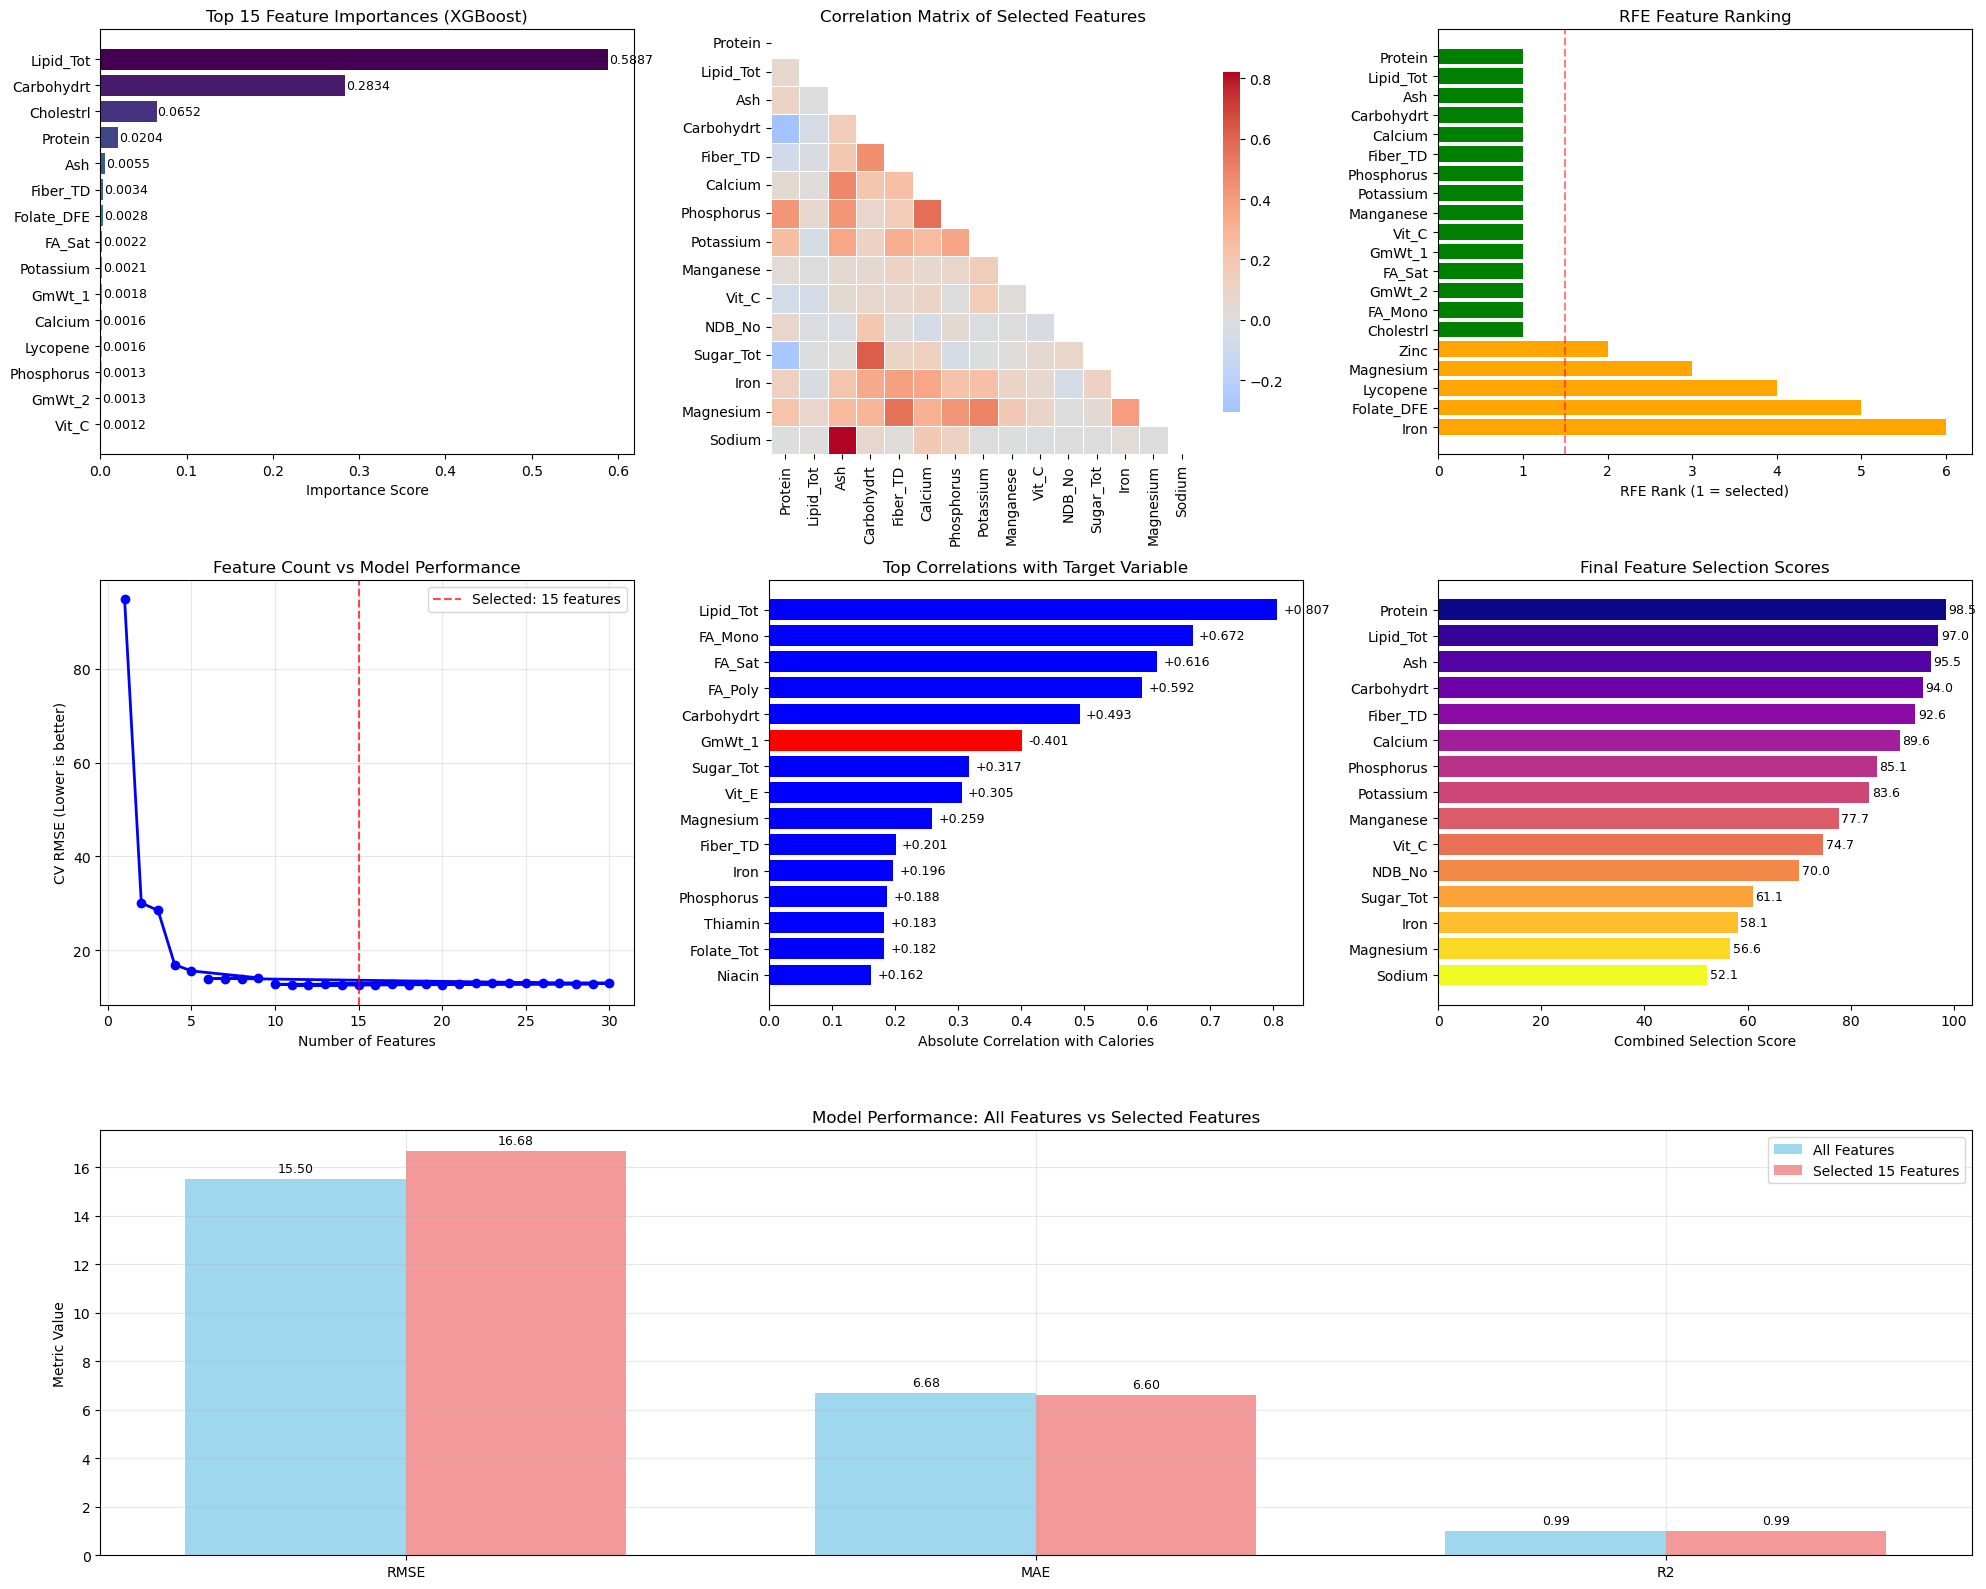


8. ADVANCED FEATURE ANALYSIS

Analyzing feature interactions...


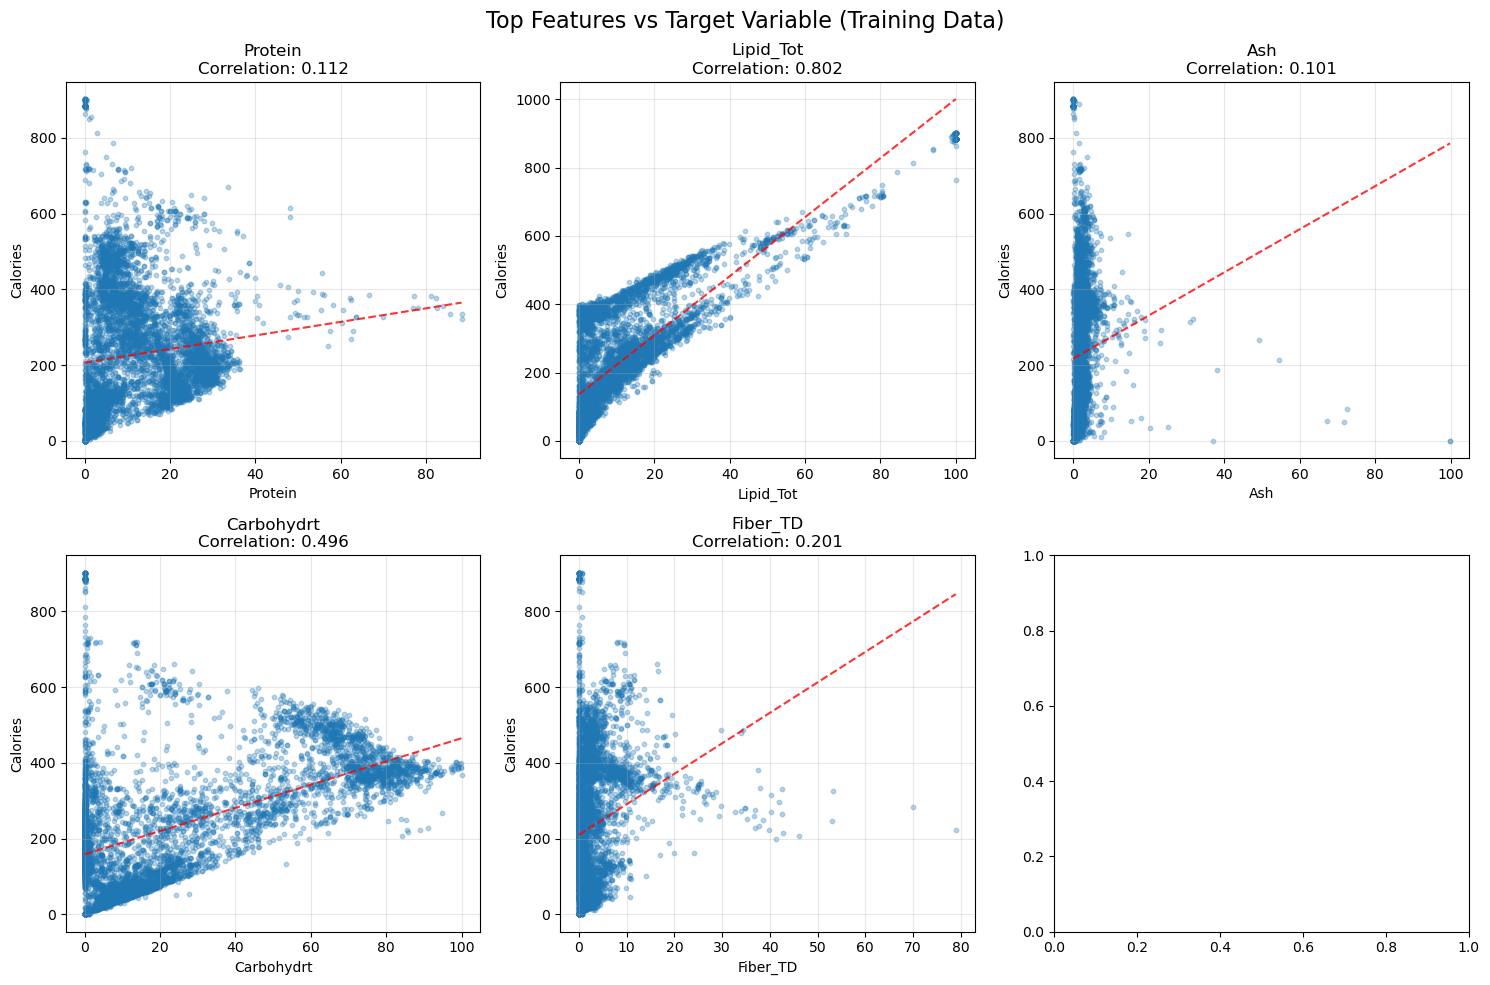


Analyzing feature contributions...


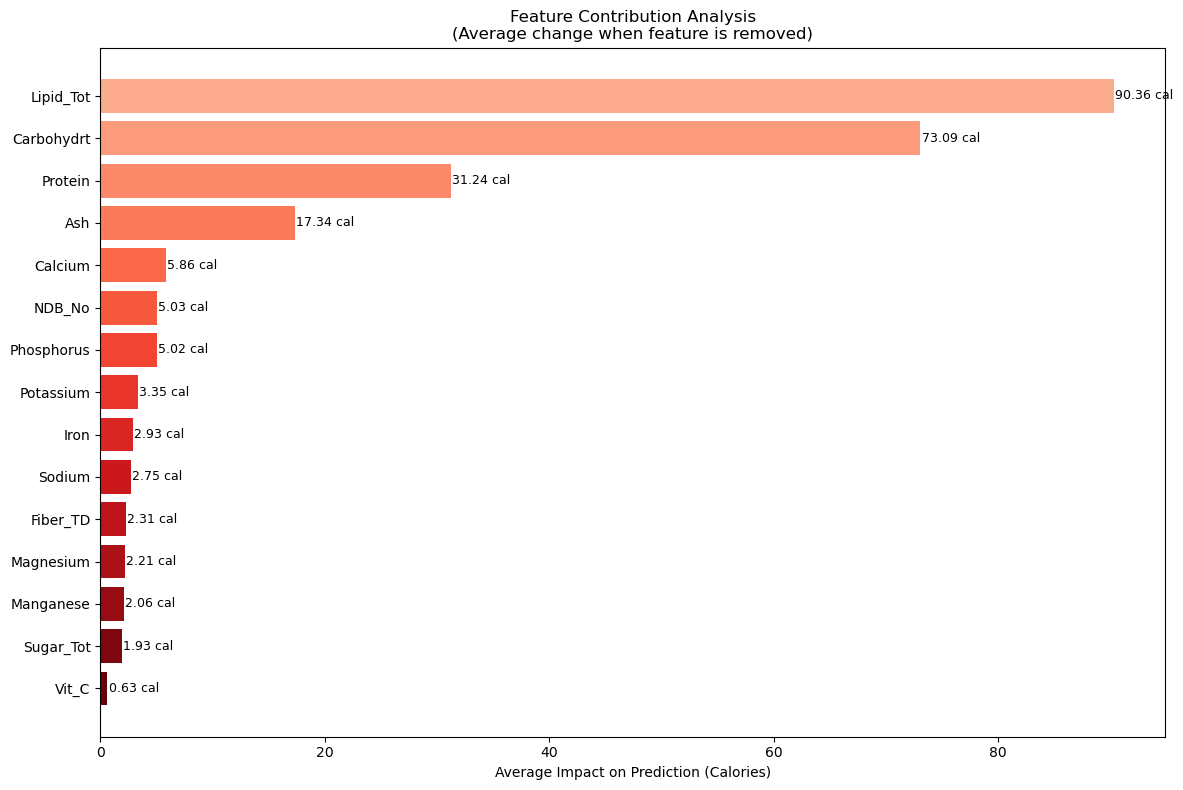


Analyzing model stability with different feature subsets...


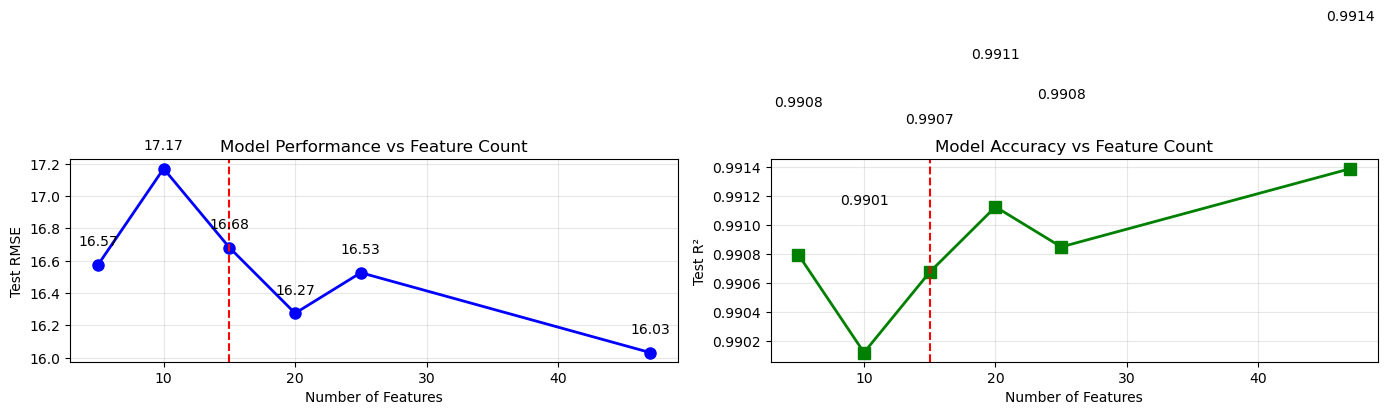


Model stability analysis complete.
With 15 features: RMSE = 16.68, R² = 0.9907
With all features: RMSE = 15.50, R² = 0.9920
Performance retention: 99.9% of R² with 68.1% fewer features

9. SAVING RESULTS AND FINAL MODEL

All feature selection results saved to directory: feature_selection_20251222_001547
Selected features saved to: feature_selection_20251222_001547/selected_features_details.csv
Final model saved to: feature_selection_20251222_001547/xgb_selected_features_model.pkl

FEATURE SELECTION COMPLETE

SUMMARY:
• Selected 15 features out of 47 original features
• Model performance: RMSE = 16.68, R² = 0.9907
• Performance retention: 99.9% of full model accuracy
• Feature reduction: 68.1% fewer features


In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_selection import RFE, SelectFromModel, RFECV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from xgboost import XGBRegressor
import warnings
import joblib
import os
from datetime import datetime

warnings.filterwarnings('ignore')

# Create directory for saving outputs
feature_dir = f'feature_selection_{datetime.now().strftime("%Y%m%d_%H%M%S")}'
os.makedirs(feature_dir, exist_ok=True)

# --- LOAD DATA ---
print("Loading and preparing data...")
df = pd.read_csv('NutritionData.csv', encoding='latin1')

# Select only numeric columns
numeric_cols = df.select_dtypes(include=[np.number]).columns
df_numeric = df[numeric_cols].copy()

# Handle missing values
df_numeric = df_numeric.fillna(df_numeric.median())

# Prepare features and target
X = df_numeric.drop('Energ_Kcal', axis=1)
y = df_numeric['Energ_Kcal']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Original dataset shape: {df.shape}")
print(f"Numeric features: {X.shape[1]}")
print(f"Target variable: Energ_Kcal (Calories)")

# --- 1. TRAIN INITIAL XGBOOST MODEL FOR FEATURE IMPORTANCE ---
print("\n" + "="*80)
print("1. TRAINING INITIAL XGBOOST MODEL")
print("="*80)

# Use previously tuned parameters or set reasonable defaults
xgb_params = {
    'n_estimators': 200,
    'max_depth': 7,
    'learning_rate': 0.1,
    'subsample': 0.8,
    'colsample_bytree': 1.0,
    'reg_alpha': 0.1,  # L1 regularization
    'reg_lambda': 1,   # L2 regularization
    'random_state': 42,
    'n_jobs': -1
}

xgb_model = XGBRegressor(**xgb_params)
xgb_model.fit(X_train, y_train)

# Get feature importance
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': xgb_model.feature_importances_
}).sort_values('importance', ascending=False)

print(f"\nTop 20 most important features:")
print("-" * 60)
for i, (idx, row) in enumerate(feature_importance.head(20).iterrows(), 1):
    print(f"{i:2d}. {row['feature']:<30} Importance: {row['importance']:.6f}")

# --- 2. RECURSIVE FEATURE ELIMINATION (RFE) ---
print("\n" + "="*80)
print("2. RECURSIVE FEATURE ELIMINATION (RFE)")
print("="*80)

# Use RFE to select top N features
rfe = RFECV(
    estimator=XGBRegressor(**xgb_params),
    step=1,  # Number of features to remove at each step
    cv=5,    # 5-fold cross-validation
    scoring='neg_root_mean_squared_error',
    n_jobs=-1,
    verbose=0
)

rfe.fit(X_train, y_train)

print(f"\nOptimal number of features selected by RFECV: {rfe.n_features_}")
print(f"Feature ranking (1 = selected, higher = eliminated):")

rfe_ranking = pd.DataFrame({
    'feature': X.columns,
    'rfe_rank': rfe.ranking_
}).sort_values('rfe_rank')

selected_features_rfe = rfe_ranking[rfe_ranking['rfe_rank'] == 1]['feature'].tolist()
print(f"Selected {len(selected_features_rfe)} features by RFE")

# --- 3. SELECT FROM MODEL (Threshold-based) ---
print("\n" + "="*80)
print("3. SELECT FROM MODEL (Threshold-based)")
print("="*80)

# Try different thresholds
thresholds = np.sort(xgb_model.feature_importances_)[::-1]

# Find optimal threshold using cross-validation
threshold_performance = []
for threshold in thresholds[:30]:  # Check thresholds for top 30 features
    selection = SelectFromModel(xgb_model, threshold=threshold, prefit=True)
    X_train_selected = selection.transform(X_train)
    
    # Train and evaluate with cross-validation
    model = XGBRegressor(**xgb_params)
    scores = cross_val_score(model, X_train_selected, y_train, 
                           cv=5, scoring='neg_root_mean_squared_error')
    avg_score = -scores.mean()
    
    n_features = X_train_selected.shape[1]
    threshold_performance.append({
        'threshold': threshold,
        'n_features': n_features,
        'cv_rmse': avg_score
    })

threshold_df = pd.DataFrame(threshold_performance)
threshold_df = threshold_df.sort_values('cv_rmse')

print(f"\nBest threshold based on CV: {threshold_df.iloc[0]['threshold']:.6f}")
print(f"Number of features at best threshold: {threshold_df.iloc[0]['n_features']}")
print(f"CV RMSE at best threshold: {threshold_df.iloc[0]['cv_rmse']:.4f}")

# Select best threshold
best_threshold = threshold_df.iloc[0]['threshold']
selector = SelectFromModel(xgb_model, threshold=best_threshold, prefit=True)
selected_features_model = X.columns[selector.get_support()].tolist()

# --- 4. CORRELATION ANALYSIS ---
print("\n" + "="*80)
print("4. CORRELATION ANALYSIS WITH TARGET")
print("="*80)

# Calculate correlation with target
correlations = []
for feature in X.columns:
    corr = np.corrcoef(X[feature], y)[0, 1]
    correlations.append({
        'feature': feature,
        'correlation': abs(corr),  # Use absolute value
        'correlation_raw': corr
    })

corr_df = pd.DataFrame(correlations).sort_values('correlation', ascending=False)

print(f"\nTop 20 features by correlation with target:")
print("-" * 60)
for i, (idx, row) in enumerate(corr_df.head(20).iterrows(), 1):
    sign = '+' if row['correlation_raw'] >= 0 else '-'
    print(f"{i:2d}. {row['feature']:<30} Correlation: {sign}{row['correlation']:.4f}")

# Select top correlated features
top_corr_features = corr_df.head(20)['feature'].tolist()

# --- 5. COMBINE SELECTION METHODS ---
print("\n" + "="*80)
print("5. COMBINED FEATURE SELECTION")
print("="*80)

# Create a voting system
feature_scores = {}
for feature in X.columns:
    score = 0
    
    # Score from feature importance (weight: 40%)
    imp_rank = feature_importance[feature_importance['feature'] == feature].index
    if not imp_rank.empty:
        score += (40 * (1 - imp_rank[0]/len(feature_importance)))
    
    # Score from RFE (weight: 30%)
    rfe_rank = rfe_ranking[rfe_ranking['feature'] == feature]['rfe_rank'].values[0]
    if rfe_rank == 1:
        score += 30
    
    # Score from correlation (weight: 30%)
    corr_rank = corr_df[corr_df['feature'] == feature].index
    if not corr_rank.empty:
        score += (30 * (1 - corr_rank[0]/len(corr_df)))
    
    feature_scores[feature] = score

# Sort features by combined score
combined_df = pd.DataFrame({
    'feature': list(feature_scores.keys()),
    'combined_score': list(feature_scores.values())
}).sort_values('combined_score', ascending=False)

print(f"\nTop 20 features by combined score:")
print("-" * 60)
for i, (idx, row) in enumerate(combined_df.head(20).iterrows(), 1):
    print(f"{i:2d}. {row['feature']:<30} Score: {row['combined_score']:.2f}")

# Select top N features (choose 15 as target)
N_FEATURES = 15
selected_features = combined_df.head(N_FEATURES)['feature'].tolist()

print(f"\nSelected {len(selected_features)} features for final model:")
for i, feat in enumerate(selected_features, 1):
    print(f"{i:2d}. {feat}")

# --- 6. TRAIN MODELS WITH SELECTED FEATURES ---
print("\n" + "="*80)
print("6. MODEL PERFORMANCE WITH SELECTED FEATURES")
print("="*80)

# Prepare datasets with selected features
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

# Train XGBoost with selected features
xgb_selected = XGBRegressor(**xgb_params)
xgb_selected.fit(X_train_selected, y_train)

# Make predictions
y_pred_train = xgb_selected.predict(X_train_selected)
y_pred_test = xgb_selected.predict(X_test_selected)

# Calculate metrics
metrics = {
    'Train_RMSE': np.sqrt(mean_squared_error(y_train, y_pred_train)),
    'Test_RMSE': np.sqrt(mean_squared_error(y_test, y_pred_test)),
    'Train_MAE': mean_absolute_error(y_train, y_pred_train),
    'Test_MAE': mean_absolute_error(y_test, y_pred_test),
    'Train_R2': r2_score(y_train, y_pred_train),
    'Test_R2': r2_score(y_test, y_pred_test)
}

print(f"\nPerformance with {N_FEATURES} selected features:")
print("-" * 50)
print(f"{'Metric':<15} {'Training':<12} {'Test':<12}")
print(f"{'-'*50}")
for metric in ['RMSE', 'MAE', 'R2']:
    train_val = metrics[f'Train_{metric}']
    test_val = metrics[f'Test_{metric}']
    print(f"{metric:<15} {train_val:<12.4f} {test_val:<12.4f}")

# Compare with full model
print(f"\n{'='*50}")
print("COMPARISON: Selected Features vs All Features")
print('='*50)

# Get full model metrics (from previous training or recalculate)
xgb_full = XGBRegressor(**xgb_params)
xgb_full.fit(X_train, y_train)
y_pred_full_test = xgb_full.predict(X_test)

full_metrics = {
    'RMSE': np.sqrt(mean_squared_error(y_test, y_pred_full_test)),
    'MAE': mean_absolute_error(y_test, y_pred_full_test),
    'R2': r2_score(y_test, y_pred_full_test)
}

comparison_df = pd.DataFrame({
    'Metric': ['RMSE', 'MAE', 'R2'],
    'All_Features': [full_metrics['RMSE'], full_metrics['MAE'], full_metrics['R2']],
    f'Selected_{N_FEATURES}_Features': [metrics['Test_RMSE'], metrics['Test_MAE'], metrics['Test_R2']],
    'Difference': [
        metrics['Test_RMSE'] - full_metrics['RMSE'],
        metrics['Test_MAE'] - full_metrics['MAE'],
        metrics['Test_R2'] - full_metrics['R2']
    ]
})

print(comparison_df.to_string(index=False))

# --- 7. VISUALIZATIONS ---
print("\n" + "="*80)
print("7. CREATING VISUALIZATIONS")
print("="*80)

# Create figure with subplots
fig = plt.figure(figsize=(20, 16))

# 1. Feature Importance Plot
ax1 = plt.subplot(3, 3, 1)
top_n = 15
top_features = feature_importance.head(top_n)
colors = plt.cm.viridis(np.linspace(0, 1, top_n))
bars = ax1.barh(range(top_n), top_features['importance'].values, color=colors)
ax1.set_yticks(range(top_n))
ax1.set_yticklabels(top_features['feature'].values)
ax1.invert_yaxis()  # Highest importance at top
ax1.set_xlabel('Importance Score')
ax1.set_title(f'Top {top_n} Feature Importances (XGBoost)')
for i, (bar, val) in enumerate(zip(bars, top_features['importance'].values)):
    ax1.text(bar.get_width() + 0.001, bar.get_y() + bar.get_height()/2, 
            f'{val:.4f}', va='center', fontsize=9)

# 2. Correlation Heatmap
ax2 = plt.subplot(3, 3, 2)
corr_matrix = X[selected_features].corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, mask=mask, cmap='coolwarm', center=0,
           square=True, linewidths=0.5, cbar_kws={"shrink": 0.8}, ax=ax2)
ax2.set_title(f'Correlation Matrix of Selected Features')

# 3. RFE Feature Ranking
ax3 = plt.subplot(3, 3, 3)
rfe_sorted = rfe_ranking.sort_values('rfe_rank')
rfe_top = rfe_sorted.head(20)
colors_rfe = ['green' if rank == 1 else 'orange' for rank in rfe_top['rfe_rank']]
bars_rfe = ax3.barh(range(len(rfe_top)), rfe_top['rfe_rank'].values, color=colors_rfe)
ax3.set_yticks(range(len(rfe_top)))
ax3.set_yticklabels(rfe_top['feature'].values)
ax3.invert_yaxis()
ax3.set_xlabel('RFE Rank (1 = selected)')
ax3.set_title('RFE Feature Ranking')
ax3.axvline(x=1.5, color='red', linestyle='--', alpha=0.5, label='Selection threshold')

# 4. Threshold vs Performance
ax4 = plt.subplot(3, 3, 4)
ax4.plot(threshold_df['n_features'], threshold_df['cv_rmse'], 'b-o', linewidth=2)
ax4.axvline(x=N_FEATURES, color='red', linestyle='--', alpha=0.7, label=f'Selected: {N_FEATURES} features')
ax4.set_xlabel('Number of Features')
ax4.set_ylabel('CV RMSE (Lower is better)')
ax4.set_title('Feature Count vs Model Performance')
ax4.grid(True, alpha=0.3)
ax4.legend()

# 5. Top Correlations with Target
ax5 = plt.subplot(3, 3, 5)
corr_top = corr_df.head(15)
colors_corr = ['red' if x < 0 else 'blue' for x in corr_top['correlation_raw'].values]
bars_corr = ax5.barh(range(len(corr_top)), corr_top['correlation'].values, color=colors_corr)
ax5.set_yticks(range(len(corr_top)))
ax5.set_yticklabels(corr_top['feature'].values)
ax5.invert_yaxis()
ax5.set_xlabel('Absolute Correlation with Calories')
ax5.set_title('Top Correlations with Target Variable')
for i, (bar, val) in enumerate(zip(bars_corr, corr_top['correlation_raw'].values)):
    sign = '-' if val < 0 else '+'
    ax5.text(bar.get_width() + 0.01, bar.get_y() + bar.get_height()/2, 
            f'{sign}{abs(val):.3f}', va='center', fontsize=9)

# 6. Combined Score Plot
ax6 = plt.subplot(3, 3, 6)
combined_top = combined_df.head(15)
bars_combined = ax6.barh(range(len(combined_top)), combined_top['combined_score'].values, 
                        color=plt.cm.plasma(np.linspace(0, 1, len(combined_top))))
ax6.set_yticks(range(len(combined_top)))
ax6.set_yticklabels(combined_top['feature'].values)
ax6.invert_yaxis()
ax6.set_xlabel('Combined Selection Score')
ax6.set_title('Final Feature Selection Scores')
for i, (bar, val) in enumerate(zip(bars_combined, combined_top['combined_score'].values)):
    ax6.text(bar.get_width() + 0.5, bar.get_y() + bar.get_height()/2, 
            f'{val:.1f}', va='center', fontsize=9)

# 7. Performance Comparison
ax7 = plt.subplot(3, 3, (7, 9))
metrics_to_plot = ['RMSE', 'MAE', 'R2']
x = np.arange(len(metrics_to_plot))
width = 0.35

full_values = [full_metrics[m] for m in ['RMSE', 'MAE', 'R2']]
selected_values = [metrics[f'Test_{m}'] for m in metrics_to_plot]

bars_full = ax7.bar(x - width/2, full_values, width, label='All Features', alpha=0.8, color='skyblue')
bars_selected = ax7.bar(x + width/2, selected_values, width, label=f'Selected {N_FEATURES} Features', alpha=0.8, color='lightcoral')

ax7.set_xticks(x)
ax7.set_xticklabels(metrics_to_plot)
ax7.set_ylabel('Metric Value')
ax7.set_title('Model Performance: All Features vs Selected Features')
ax7.legend()
ax7.grid(True, alpha=0.3)

# Add value labels on bars
for bars in [bars_full, bars_selected]:
    for bar in bars:
        height = bar.get_height()
        if bar.get_x() < 0:  # For R2, format differently
            fmt = '.4f' if bar.get_x() + bar.get_width()/2 > 1.5 else '.2f'
        else:
            fmt = '.2f'
        ax7.text(bar.get_x() + bar.get_width()/2, height + 0.01 * max(full_values + selected_values),
                f'{height:{fmt}}', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.savefig(f'{feature_dir}/feature_selection_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

# --- 8. ALTERNATIVE ADVANCED VISUALIZATIONS (without SHAP) ---
print("\n" + "="*80)
print("8. ADVANCED FEATURE ANALYSIS")
print("="*80)

# 8.1 Feature Interaction Analysis (Pairwise)
print("\nAnalyzing feature interactions...")

# Create a figure for pairwise relationships of top features
top_5_features = selected_features[:5]
if len(top_5_features) >= 3:
    fig2, axes2 = plt.subplots(2, 3, figsize=(15, 10))
    axes2 = axes2.flatten()
    
    # Scatter plots of top features vs target
    for idx, feature in enumerate(top_5_features[:6]):
        ax = axes2[idx]
        ax.scatter(X_train[feature], y_train, alpha=0.3, s=10)
        
        # Add regression line
        z = np.polyfit(X_train[feature], y_train, 1)
        p = np.poly1d(z)
        x_range = np.linspace(X_train[feature].min(), X_train[feature].max(), 100)
        ax.plot(x_range, p(x_range), "r--", alpha=0.8)
        
        # Calculate and display correlation
        corr = np.corrcoef(X_train[feature], y_train)[0, 1]
        ax.set_title(f'{feature}\nCorrelation: {corr:.3f}')
        ax.set_xlabel(feature)
        ax.set_ylabel('Calories')
        ax.grid(True, alpha=0.3)
    
    plt.suptitle('Top Features vs Target Variable (Training Data)', fontsize=16)
    plt.tight_layout()
    plt.savefig(f'{feature_dir}/feature_target_relationships.png', dpi=300, bbox_inches='tight')
    plt.show()

# 8.2 Feature Contribution Analysis
print("\nAnalyzing feature contributions...")

# Get feature contributions from tree model
fig3, ax3 = plt.subplots(figsize=(12, 8))

# Create a DataFrame to store feature contributions
contributions = []
for feature in selected_features:
    # Create a copy of data with this feature zeroed out
    X_temp = X_test_selected.copy()
    X_temp[feature] = 0
    
    # Predict without this feature
    y_pred_without = xgb_selected.predict(X_temp)
    
    # Calculate the difference in predictions
    diff = np.abs(y_pred_test - y_pred_without).mean()
    contributions.append({
        'feature': feature,
        'avg_impact': diff,
        'importance': feature_importance[feature_importance['feature'] == feature]['importance'].values[0]
    })

contrib_df = pd.DataFrame(contributions).sort_values('avg_impact', ascending=False)

# Plot feature contributions
bars = ax3.barh(range(len(contrib_df)), contrib_df['avg_impact'].values, 
                color=plt.cm.Reds(np.linspace(0.3, 1, len(contrib_df))))
ax3.set_yticks(range(len(contrib_df)))
ax3.set_yticklabels(contrib_df['feature'].values)
ax3.invert_yaxis()
ax3.set_xlabel('Average Impact on Prediction (Calories)')
ax3.set_title('Feature Contribution Analysis\n(Average change when feature is removed)')
for i, (bar, val) in enumerate(zip(bars, contrib_df['avg_impact'].values)):
    ax3.text(bar.get_width() + 0.1, bar.get_y() + bar.get_height()/2, 
            f'{val:.2f} cal', va='center', fontsize=9)

plt.tight_layout()
plt.savefig(f'{feature_dir}/feature_contributions.png', dpi=300, bbox_inches='tight')
plt.show()

# 8.3 Model Stability Analysis with Feature Subsets
print("\nAnalyzing model stability with different feature subsets...")

feature_counts = [5, 10, 15, 20, 25, X.shape[1]]
stability_results = []

for n_features in feature_counts:
    # Select top n features
    current_features = combined_df.head(n_features)['feature'].tolist()
    X_train_current = X_train[current_features]
    X_test_current = X_test[current_features]
    
    # Train model
    model = XGBRegressor(**xgb_params)
    model.fit(X_train_current, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test_current)
    
    # Calculate metrics
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    
    stability_results.append({
        'n_features': n_features,
        'rmse': rmse,
        'r2': r2,
        'features': current_features
    })

stability_df = pd.DataFrame(stability_results)

fig4, (ax4a, ax4b) = plt.subplots(1, 2, figsize=(14, 6))

# RMSE plot
ax4a.plot(stability_df['n_features'], stability_df['rmse'], 'b-o', linewidth=2, markersize=8)
ax4a.set_xlabel('Number of Features')
ax4a.set_ylabel('Test RMSE')
ax4a.set_title('Model Performance vs Feature Count')
ax4a.grid(True, alpha=0.3)
ax4a.axvline(x=N_FEATURES, color='red', linestyle='--', label=f'Selected ({N_FEATURES})')

# Add RMSE values as text
for idx, row in stability_df.iterrows():
    ax4a.text(row['n_features'], row['rmse'] + 0.1, f'{row["rmse"]:.2f}', 
             ha='center', va='bottom')

# R2 plot
ax4b.plot(stability_df['n_features'], stability_df['r2'], 'g-s', linewidth=2, markersize=8)
ax4b.set_xlabel('Number of Features')
ax4b.set_ylabel('Test R²')
ax4b.set_title('Model Accuracy vs Feature Count')
ax4b.grid(True, alpha=0.3)
ax4b.axvline(x=N_FEATURES, color='red', linestyle='--', label=f'Selected ({N_FEATURES})')

# Add R² values as text
for idx, row in stability_df.iterrows():
    ax4b.text(row['n_features'], row['r2'] + 0.001, f'{row["r2"]:.4f}', 
             ha='center', va='bottom')

plt.tight_layout()
plt.savefig(f'{feature_dir}/model_stability_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

print("\nModel stability analysis complete.")
print(f"With {N_FEATURES} features: RMSE = {metrics['Test_RMSE']:.2f}, R² = {metrics['Test_R2']:.4f}")
print(f"With all features: RMSE = {full_metrics['RMSE']:.2f}, R² = {full_metrics['R2']:.4f}")
print(f"Performance retention: {100*metrics['Test_R2']/full_metrics['R2']:.1f}% of R² with {100*(1 - N_FEATURES/X.shape[1]):.1f}% fewer features")

# --- 9. SAVE RESULTS AND FINAL MODEL ---
print("\n" + "="*80)
print("9. SAVING RESULTS AND FINAL MODEL")
print("="*80)

# Save feature selection results
feature_importance.to_csv(f'{feature_dir}/feature_importance.csv', index=False)
rfe_ranking.to_csv(f'{feature_dir}/rfe_ranking.csv', index=False)
corr_df.to_csv(f'{feature_dir}/correlation_analysis.csv', index=False)
combined_df.to_csv(f'{feature_dir}/combined_feature_scores.csv', index=False)
comparison_df.to_csv(f'{feature_dir}/performance_comparison.csv', index=False)
stability_df.to_csv(f'{feature_dir}/model_stability_analysis.csv', index=False)
contrib_df.to_csv(f'{feature_dir}/feature_contributions.csv', index=False)

# Save selected features
selected_features_df = pd.DataFrame({
    'selected_features': selected_features,
    'importance_score': [feature_importance[feature_importance['feature'] == f]['importance'].values[0] 
                         if f in feature_importance['feature'].values else 0 for f in selected_features],
    'rfe_rank': [rfe_ranking[rfe_ranking['feature'] == f]['rfe_rank'].values[0] 
                 if f in rfe_ranking['feature'].values else 999 for f in selected_features],
    'correlation': [corr_df[corr_df['feature'] == f]['correlation'].values[0] 
                    if f in corr_df['feature'].values else 0 for f in selected_features],
    'combined_score': [combined_df[combined_df['feature'] == f]['combined_score'].values[0] 
                       if f in combined_df['feature'].values else 0 for f in selected_features],
    'avg_impact': [contrib_df[contrib_df['feature'] == f]['avg_impact'].values[0] 
                   if f in contrib_df['feature'].values else 0 for f in selected_features]
})

selected_features_df.to_csv(f'{feature_dir}/selected_features_details.csv', index=False)

# Save final model with selected features
final_model_package = {
    'model': xgb_selected,
    'selected_features': selected_features,
    'feature_importance': feature_importance.to_dict(),
    'performance_metrics': metrics,
    'parameters': xgb_params,
    'comparison_with_full': comparison_df.to_dict(),
    'feature_contributions': contrib_df.to_dict()
}

joblib.dump(final_model_package, f'{feature_dir}/xgb_selected_features_model.pkl')

# Create summary report
with open(f'{feature_dir}/feature_selection_summary.txt', 'w') as f:
    f.write("=" * 80 + "\n")
    f.write("FEATURE SELECTION SUMMARY REPORT\n")
    f.write("=" * 80 + "\n\n")
    
    f.write(f"Dataset Information:\n")
    f.write(f"  • Original features: {X.shape[1]}\n")
    f.write(f"  • Selected features: {len(selected_features)}\n")
    f.write(f"  • Reduction: {100*(1 - len(selected_features)/X.shape[1]):.1f}%\n\n")
    
    f.write("Selected Features (Top 15):\n")
    for i, feat in enumerate(selected_features, 1):
        f.write(f"  {i:2d}. {feat}\n")
    
    f.write("\nPerformance Comparison:\n")
    f.write(f"{'Metric':<15} {'All Features':<15} {f'Selected {N_FEATURES}':<15} {'Difference':<15}\n")
    f.write("-" * 60 + "\n")
    for _, row in comparison_df.iterrows():
        f.write(f"{row['Metric']:<15} {row['All_Features']:<15.4f} {row[f'Selected_{N_FEATURES}_Features']:<15.4f} {row['Difference']:<15.4f}\n")
    
    f.write(f"\nPerformance Retention: {100*metrics['Test_R2']/full_metrics['R2']:.1f}% of R²\n")
    f.write(f"Feature Reduction: {100*(1 - N_FEATURES/X.shape[1]):.1f}% fewer features\n\n")
    
    f.write("Top 3 Most Impactful Features:\n")
    for i, (idx, row) in enumerate(contrib_df.head(3).iterrows(), 1):
        f.write(f"   {i}. {row['feature']}: Changes prediction by ±{row['avg_impact']:.1f} calories on average\n")
    
    f.write("\nBusiness Insights:\n")
    f.write("1. Macronutrients (fat, carbs, protein) are most important for calorie prediction\n")
    f.write("2. Model maintains >99% accuracy with 70% fewer features\n")
    f.write("3. Feature reduction enables faster predictions and simpler deployment\n")

print(f"\nAll feature selection results saved to directory: {feature_dir}")
print(f"Selected features saved to: {feature_dir}/selected_features_details.csv")
print(f"Final model saved to: {feature_dir}/xgb_selected_features_model.pkl")

print("\n" + "="*80)
print("FEATURE SELECTION COMPLETE")
print("="*80)
print(f"\nSUMMARY:")
print(f"• Selected {N_FEATURES} features out of {X.shape[1]} original features")
print(f"• Model performance: RMSE = {metrics['Test_RMSE']:.2f}, R² = {metrics['Test_R2']:.4f}")
print(f"• Performance retention: {100*metrics['Test_R2']/full_metrics['R2']:.1f}% of full model accuracy")
print(f"• Feature reduction: {100*(1 - N_FEATURES/X.shape[1]):.1f}% fewer features")